-----------------------------

# Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

-----------------------------

# Importing Data from IMDB

Reference: https://www.imdb.com/interfaces/

**Title Basics**

title.basics.tsv.gz - Contains the following information for titles:

    tconst (string) - alphanumeric unique identifier of the title
    titleType (string) – the type/format of the title (e.g. movie, short, tvseries, tvepisode, video, etc)
    
    primaryTitle (string) – the more popular title / the title used by the filmmakers on promotional materials at the point of release
    
    originalTitle (string) - original title, in the original language
    isAdult (boolean) - 0: non-adult title; 1: adult title
    startYear (YYYY) – represents the release year of a title. In the case of TV Series, it is the series start year
    endYear (YYYY) – TV Series end year. ‘\N’ for all other title types
    runtimeMinutes – primary runtime of the title, in minutes
    genres (string array) – includes up to three genres associated with the title

In [ ]:
import pandas as pd
title_basics = pd.read_csv('title.basics.tsv/data.tsv', sep='\t', encoding='utf-8')
title_basics

**Title Ratings**

title.ratings.tsv.gz – Contains the IMDb rating and votes information for titles

    tconst (string) - alphanumeric unique identifier of the title
    averageRating – weighted average of all the individual user ratings
    numVotes - number of votes the title has received

In [ ]:
import pandas as pd
title_ratings = pd.read_csv('title.ratings.tsv/data.tsv', sep='\t', encoding='utf-8')
title_ratings

**Merging Title Basics and Title Ratings**

In [ ]:
title_ratings_basics = title_ratings.merge(title_basics, left_on='tconst', right_on='tconst')
title_ratings_basics = title_ratings_basics[title_ratings_basics['titleType'] == 'movie']

**Exporting the file**

In [ ]:
title_ratings_basics.to_csv('title_ratings_basics.csv')

**Importing again after retrieving YouTube movie trailers**

In [7]:
df_imdb = pd.read_csv('C:\\Users\\sans-\\Downloads\\FYP\\IMDB\\title_ratings_basics_2.csv', low_memory=False)
df_imdb = df_imdb.drop('Unnamed: 0', axis=1)

In [8]:
#Removing movie titles that were not selected
df_imdb.dropna(subset=['Video ID'], inplace=True)

In [9]:
df_imdb.head()

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Video ID,CommentRef,Status
28,tt14079374,8.0,12934,movie,14 Peaks: Nothing Is Impossible,14 Peaks: Nothing Is Impossible,0,2021,\N,101,"Adventure,Documentary,Sport",8QH5hBOoz08,YT_Comments_14PeaksNothingIsImpossible_2021,Generated
29,tt8579674,8.3,514903,movie,1917,1917,0,2019,\N,119,"Action,Drama,War",YqNYrYUiMfg,YT_Comments_1917_2019.xlsx,Generated
32,tt7541106,5.8,11098,movie,1BR,1BR,0,2019,\N,90,"Drama,Horror,Thriller",W1TCaha4zbk,YT_Comments_1BR_2019.xlsx,Generated
37,tt8688634,6.6,60198,movie,21 Bridges,21 Bridges,0,2019,\N,99,"Action,Thriller",BVZDhunTrYA,YT_Comments_21Bridges_2019.xlsx,Generated
58,tt10886166,3.3,70942,movie,365 Days,365 dni,0,2020,\N,114,"Drama,Romance",SnlYa90KExE,YT_Comments_365Days_2020.xlsx,Generated


----------------------------

# YouTube API Call

In [20]:
#Service for calling the YouTube API:
from apiclient.discovery import build

def build_service(filename):
    with open(filename) as f:
        key = f.readline()

    YOUTUBE_API_SERVICE_NAME = "youtube"
    YOUTUBE_API_VERSION = "v3"
    return build(YOUTUBE_API_SERVICE_NAME,
                 YOUTUBE_API_VERSION,
                 developerKey='removed for security purposes')

----------------------------

# **YouTube Video Details**




Reference: https://developers.google.com/youtube/v3/docs/videos

In [21]:
df_get_videoid = pd.read_excel('videourl.xlsx')
df_get_videoid

,Video ID
0,8QH5hBOoz08
1,YqNYrYUiMfg
2,W1TCaha4zbk
3,BVZDhunTrYA
4,SnlYa90KExE
...,...
704,DKqtR9tMyCM
705,Ry9honCV3qc
706,5J5RPNsPyWI
707,vM-Bja2Gy04


In [22]:
video_url_lst = []

for i in df_get_videoid['Video ID']:
    video_url_lst.append(str(i))
    
video_url_lst[699:]

['81uxmIO_lps',
 'EFYEni2gsK0',
 'ccaNMcPqpQ0',
 '1-q8C_c-nlM',
 '7viNG7pPm_A',
 'DKqtR9tMyCM',
 'Ry9honCV3qc',
 '5J5RPNsPyWI',
 'vM-Bja2Gy04',
 'ZlW9yhUKlkQ']

In [23]:
from pprint import pprint

service = build_service('removed for security purposes')
part_string = 'contentDetails,statistics,snippet'

video_ids = video_url_lst[699:]

response = service.videos().list(
    part=part_string,
    id=video_ids).execute()

In [25]:
video_stats = []

for i in response['items']:
    video_stats.append(i)

In [26]:
video_stats_df = pd.DataFrame (video_stats)
video_stats_df

,kind,etag,id,snippet,contentDetails,statistics
0,youtube#video,eMV6PU3Etnm15VPIRBs_CBuPgEk,81uxmIO_lps,"{'publishedAt': '2019-09-30T14:00:00Z', 'chann...","{'duration': 'PT1M56S', 'dimension': '2d', 'de...","{'viewCount': '871111', 'likeCount': '7928', '..."
1,youtube#video,hI_TzweOKzSJZcU6LzdUbEkRBZo,EFYEni2gsK0,"{'publishedAt': '2021-03-29T15:00:09Z', 'chann...","{'duration': 'PT2M41S', 'dimension': '2d', 'de...","{'viewCount': '33021887', 'likeCount': '142030..."
2,youtube#video,G30OwSzERYEIkNYlEd4RMlryRag,ccaNMcPqpQ0,"{'publishedAt': '2020-12-16T17:51:50Z', 'chann...","{'duration': 'PT2M35S', 'dimension': '2d', 'de...","{'viewCount': '8320279', 'likeCount': '99884',..."
3,youtube#video,IZjcXVLeXJSHlthgwYivUJjLZaM,1-q8C_c-nlM,"{'publishedAt': '2019-02-28T05:30:16Z', 'chann...","{'duration': 'PT2M33S', 'dimension': '2d', 'de...","{'viewCount': '14130154', 'likeCount': '125652..."
4,youtube#video,EGN0YZ33IulvcLB8ZauouhvIBqQ,7viNG7pPm_A,"{'publishedAt': '2021-02-10T15:20:51Z', 'chann...","{'duration': 'PT2M41S', 'dimension': '2d', 'de...","{'viewCount': '2030534', 'likeCount': '39894',..."
5,youtube#video,Ln-u-2XcL9qssOYDQfNxMOMPDOU,DKqtR9tMyCM,"{'publishedAt': '2020-06-26T23:37:28Z', 'chann...","{'duration': 'PT1M59S', 'dimension': '2d', 'de...","{'viewCount': '1397898', 'likeCount': '12136',..."
6,youtube#video,jFeWCudVirUKQTYOYMZrQtVUdAY,Ry9honCV3qc,"{'publishedAt': '2019-02-12T17:42:18Z', 'chann...","{'duration': 'PT3M28S', 'dimension': '2d', 'de...","{'viewCount': '4157592', 'likeCount': '38916',..."
7,youtube#video,bQhywybKAkXvIU0z9YicKdlwuAM,5J5RPNsPyWI,"{'publishedAt': '2020-06-14T16:16:01Z', 'chann...","{'duration': 'PT3M4S', 'dimension': '2d', 'def...","{'viewCount': '606785', 'likeCount': '3792', '..."
8,youtube#video,eL-nYEaA1DXArjjUdq5a_4YYfnk,vM-Bja2Gy04,"{'publishedAt': '2021-02-14T15:15:16Z', 'chann...","{'duration': 'PT2M27S', 'dimension': '2d', 'de...","{'viewCount': '30472608', 'likeCount': '643592..."
9,youtube#video,FjRC0KpYaUq7EIIoxKIIAmB7LsA,ZlW9yhUKlkQ,"{'publishedAt': '2019-07-25T16:00:04Z', 'chann...","{'duration': 'PT2M39S', 'dimension': '2d', 'de...","{'viewCount': '20675431', 'likeCount': '317825..."


In [27]:
video_stats_df.to_excel('video_stats2.xlsx')

----------------------------------------

# YouTube Retrieve Comments




Reference: https://developers.google.com/youtube/v3/docs/commentThreads/list

    CommentThreads:
    https://developers.google.com/youtube/v3/docs/commentThreads/list
    
    --> Part: id / replies / snippet
    
    Snippet: return basic details about the comment thread and the thread’s top-level comment
    Replies: contains a list of replies to the top level comment.
    
    --> allThreadsRelatedToChannelId / channelId / id / videoId
    
    Interested in videoId as it returns comment threads associated with a specific video

In [11]:
import json
from csv import writer
from apiclient.discovery import build

#configure function parameters for required variables to pass to service
def get_comments(part, maxResults, textFormat, order, videoId):

    #create empty lists to store desired information
    comments, commentsId, repliesCount, likesCount, viewerRating = [], [], [], [], []
       
    service = build_service('removed for security purposes')
    
    response = service.commentThreads().list(
        part=part,
        maxResults=maxResults,
        textFormat=textFormat,
        order=order,
        videoId=videoId
    ).execute()
                 

    while response:
                 
        for item in response['items']:
            
            #index item for desired data features
            comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
            comment_id = item['snippet']['topLevelComment']['id']
            reply_count = item['snippet']['totalReplyCount']
            like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
            
            comments.append(comment)
            commentsId.append(comment_id)
            repliesCount.append(reply_count)
            likesCount.append(like_count)


        #check for nextPageToken, and if it exists, set response equal to the JSON response
        if 'nextPageToken' in response:
            response = service.commentThreads().list(
                part=part,
                maxResults=maxResults,
                textFormat=textFormat,
                order=order,
                videoId=videoId,
                pageToken=response['nextPageToken']
            ).execute()
        else:
            break

    #return data of interest
    return {
        'Comments': comments,
        'Comment ID': commentsId,
        'Reply Count' : repliesCount,
        'Like Count' : likesCount
    }

In [12]:
#Single Liner:
#video_id = 'sY8gUtyeAKE'
#video_export = 'YT_Comments_Coming2America_2021.xlsx'

#List:
video_id_lst = ['mphTMApR8iI',
'Z1BCujX3pw8'
]

video_export_lst = ['YT_Comments_CanYouKeepaSecret_2019.xlsx',
'YT_Comments_CaptainMarvel_2019.xlsx'
]

#Loading through excel:
# load_comments = pd.read_excel('C:\\Users\\sans-\\Downloads\\FYP\\LoadComments.xlsx')
# video_id_lst = list(load_comments['Video ID'])
# video_export_lst = list(load_comments['CommentRef'])

video_dict = dict(zip(video_id_lst, video_export_lst))

for key, value in video_dict.items():
    
    df = pd.DataFrame.from_dict(get_comments(part='snippet', 
                 maxResults=100, 
                 textFormat='plainText',
                 order='relevance',
                 videoId=key))
    
    df.to_excel(value)

In [13]:
df

,Comments,Comment ID,Reply Count,Like Count
0,“Discover what makes her a hero” *cuts to capt...,UgwcwFG4pIuNvh4Elh14AaABAg,19,1250
1,When Marvel haven’t released a movie in ages s...,Ugx2Newf6Z-3NXHT7Ih4AaABAg,42,4513
2,Some people stop watching trailers after the m...,Ugwdp77EW7djp6hI_sJ4AaABAg,18,1737
3,I don’t care what anyone says I thought this m...,UgzlBGhoZhPvJ20DQFh4AaABAg,1,29
4,That background score is killing it !!,Ugx5yrbeoHxj5Lz94_14AaABAg,19,1461
...,...,...,...,...
1995,Now this puts a smile on my face,Ugz7kr8sKCNQ7B7Qdad4AaABAg,5,82
1996,Crap movie,UgzZ2OZZ9oOI0UN6tLp4AaABAg,0,0
1997,SO HYPED AND I HOPE THERES AN AFT CREDITS SCEN...,Ugz-r2TDIVJFzYs53vt4AaABAg,3,48
1998,Movie was such a disappointment. Larson was...,Ugxi7AuubvAMpubYI3h4AaABAg,0,1


-----------------------------------

# Combining Comments

https://www.tutorialspoint.com/python-how-to-merge-all-excel-files-in-a-folder#:~:text=To%20merge%20all%20excel%20files%20in%20a%20folder%2C%20use%20the,and%20the%20append()%20method.&text=Note%20%E2%88%92%20You%20may%20need%20to%20install%20openpyxl%20and%20xlrd%20packages.

In [537]:
import glob
path = "C:\\Users\\sans-\\Downloads\\FYP\\YT Comments"
filenames = glob.glob(path + "\*.xlsx")
print('File names:', filenames)

File names: ['C:\\Users\\sans-\\Downloads\\FYP\\YT Comments\\YT_Comments_14PeaksNothingIsImpossible_2021.xlsx', 'C:\\Users\\sans-\\Downloads\\FYP\\YT Comments\\YT_Comments_1917_2019.xlsx', 'C:\\Users\\sans-\\Downloads\\FYP\\YT Comments\\YT_Comments_1BR_2019.xlsx', 'C:\\Users\\sans-\\Downloads\\FYP\\YT Comments\\YT_Comments_21Bridges_2019.xlsx', 'C:\\Users\\sans-\\Downloads\\FYP\\YT Comments\\YT_Comments_365Days_2020.xlsx', 'C:\\Users\\sans-\\Downloads\\FYP\\YT Comments\\YT_Comments_3fromHell_2019.xlsx', 'C:\\Users\\sans-\\Downloads\\FYP\\YT Comments\\YT_Comments_47MetersDownUncaged_2019.xlsx', 'C:\\Users\\sans-\\Downloads\\FYP\\YT Comments\\YT_Comments_6Underground_2019.xlsx', 'C:\\Users\\sans-\\Downloads\\FYP\\YT Comments\\YT_Comments_7500_2019.xlsx', 'C:\\Users\\sans-\\Downloads\\FYP\\YT Comments\\YT_Comments_8BitChristmas_2021.xlsx', 'C:\\Users\\sans-\\Downloads\\FYP\\YT Comments\\YT_Comments_ABeautifulDayintheNeighborhood_2019.xlsx', 'C:\\Users\\sans-\\Downloads\\FYP\\YT Comments\\

In [538]:
df_yt_comments = pd.DataFrame()

for file in filenames:
    df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True, sort=False)
    df['from']=os.path.split(file)[1][:-5]
    df_yt_comments = df_yt_comments.append(df, ignore_index=True)
    
df_yt_comments.to_excel("C:/Users/sans-/Downloads/FYP/df_yt_comments.xlsx", index=False)

In [539]:
df_yt_comments.shape

(967650, 8)

# **Text Cleaning**

In [540]:
df = pd.read_excel('C:\\Users\\sans-\\Downloads\\FYP\\df_yt_comments.xlsx')
df = df.drop('Unnamed: 0', axis=1)

In [541]:
df.dropna(subset=['Comments'], inplace=True)

In [542]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 967649 entries, 0 to 967649
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Comments     967649 non-null  object
 1   Comment ID   967649 non-null  object
 2   Reply Count  967649 non-null  int64 
 3   Like Count   967649 non-null  int64 
 4   tconst       108 non-null     object
 5   from         967649 non-null  object
 6   Video ID     98 non-null      object
dtypes: int64(2), object(5)
memory usage: 59.1+ MB


In [543]:
df.head()

,Comments,Comment ID,Reply Count,Like Count,tconst,from,Video ID
0,So excited for this!! 💥💥,UgyCM8SdiQwxnHaCVUN4AaABAg,74,5233,tt14079374,YT_Comments_14PeaksNothingIsImpossible_2021,NaN
1,"""If this was done by some western climbers the...",UgzyIGWzjPP1uwzU_Dp4AaABAg,8,621,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN
2,Hats off to Netflix. They are producing movies...,UgzAiQWqPedTeZZPLYV4AaABAg,21,1486,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN
3,“Giving up is not in the blood Sir” what a hea...,UgwzD8VFUaXF0m3OMuF4AaABAg,10,1004,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN
4,"He did Everest, took that viral photo and then...",UgxbRXDXuCp-QsqGz694AaABAg,2,202,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN


In [544]:
df.shape

(967649, 7)

**Convert emoji to text**

In [545]:
import emoji

df['Comments'] = df['Comments'].astype(str)
comment_textemoji = []

for i in df['Comments']:
    text = emoji.demojize(i, delimiters=(" ", ""))
    comment_textemoji.append(text)
    
df['Comment_EmojiText'] = comment_textemoji

In [546]:
df.head()

,Comments,Comment ID,Reply Count,Like Count,tconst,from,Video ID,Comment_EmojiText
0,So excited for this!! 💥💥,UgyCM8SdiQwxnHaCVUN4AaABAg,74,5233,tt14079374,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,So excited for this!! collision collision
1,"""If this was done by some western climbers the...",UgzyIGWzjPP1uwzU_Dp4AaABAg,8,621,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"""If this was done by some western climbers the..."
2,Hats off to Netflix. They are producing movies...,UgzAiQWqPedTeZZPLYV4AaABAg,21,1486,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,Hats off to Netflix. They are producing movies...
3,“Giving up is not in the blood Sir” what a hea...,UgwzD8VFUaXF0m3OMuF4AaABAg,10,1004,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,“Giving up is not in the blood Sir” what a hea...
4,"He did Everest, took that viral photo and then...",UgxbRXDXuCp-QsqGz694AaABAg,2,202,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"He did Everest, took that viral photo and then..."


In [547]:
df.shape

(967649, 8)

**Remove special characters/punctuation**

In [548]:
import re

def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

df['Cleaned Comments'] = df['Comment_EmojiText'].apply(clean)
df.head()

,Comments,Comment ID,Reply Count,Like Count,tconst,from,Video ID,Comment_EmojiText,Cleaned Comments
0,So excited for this!! 💥💥,UgyCM8SdiQwxnHaCVUN4AaABAg,74,5233,tt14079374,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,So excited for this!! collision collision,So excited for this collision collision
1,"""If this was done by some western climbers the...",UgzyIGWzjPP1uwzU_Dp4AaABAg,8,621,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"""If this was done by some western climbers the...",If this was done by some western climbers the...
2,Hats off to Netflix. They are producing movies...,UgzAiQWqPedTeZZPLYV4AaABAg,21,1486,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,Hats off to Netflix. They are producing movies...,Hats off to Netflix They are producing movies ...
3,“Giving up is not in the blood Sir” what a hea...,UgwzD8VFUaXF0m3OMuF4AaABAg,10,1004,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,“Giving up is not in the blood Sir” what a hea...,Giving up is not in the blood Sir what a hear...
4,"He did Everest, took that viral photo and then...",UgxbRXDXuCp-QsqGz694AaABAg,2,202,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"He did Everest, took that viral photo and then...",He did Everest took that viral photo and then ...


In [549]:
df.shape

(967649, 9)

In [550]:
df[df['Cleaned Comments'].map(lambda x: x.isascii())]

,Comments,Comment ID,Reply Count,Like Count,tconst,from,Video ID,Comment_EmojiText,Cleaned Comments
0,So excited for this!! 💥💥,UgyCM8SdiQwxnHaCVUN4AaABAg,74,5233,tt14079374,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,So excited for this!! collision collision,So excited for this collision collision
1,"""If this was done by some western climbers the...",UgzyIGWzjPP1uwzU_Dp4AaABAg,8,621,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"""If this was done by some western climbers the...",If this was done by some western climbers the...
2,Hats off to Netflix. They are producing movies...,UgzAiQWqPedTeZZPLYV4AaABAg,21,1486,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,Hats off to Netflix. They are producing movies...,Hats off to Netflix They are producing movies ...
3,“Giving up is not in the blood Sir” what a hea...,UgwzD8VFUaXF0m3OMuF4AaABAg,10,1004,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,“Giving up is not in the blood Sir” what a hea...,Giving up is not in the blood Sir what a hear...
4,"He did Everest, took that viral photo and then...",UgxbRXDXuCp-QsqGz694AaABAg,2,202,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"He did Everest, took that viral photo and then...",He did Everest took that viral photo and then ...
...,...,...,...,...,...,...,...,...,...
967645,I saw it,UgwsZYJXYII6bZsJG3N4AaABAg,0,0,NaN,YT_Comments_ZombielandDoubleTap_2019,NaN,I saw it,I saw it
967646,Look how far Marty has come.\nRust would b so ...,UgwF_aUv18OF9VRF0KZ4AaABAg,0,0,NaN,YT_Comments_ZombielandDoubleTap_2019,NaN,Look how far Marty has come.\nRust would b so ...,Look how far Marty has come Rust would b so pr...
967647,Too much comedy,Ugz0hebL5HZ_qkrtt_l4AaABAg,0,0,NaN,YT_Comments_ZombielandDoubleTap_2019,NaN,Too much comedy,Too much comedy
967648,I do love when the Gang Get Back Together one ...,UgwYo3pDuh04A3ADWY54AaABAg,1,34,NaN,YT_Comments_ZombielandDoubleTap_2019,NaN,I do love when the Gang Get Back Together one ...,I do love when the Gang Get Back Together one ...


In [551]:
df.shape

(967649, 9)

**Make all to lower case**

In [552]:
df['Cleaned Comments'] = df['Cleaned Comments'].str.lower()
df.head()

,Comments,Comment ID,Reply Count,Like Count,tconst,from,Video ID,Comment_EmojiText,Cleaned Comments
0,So excited for this!! 💥💥,UgyCM8SdiQwxnHaCVUN4AaABAg,74,5233,tt14079374,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,So excited for this!! collision collision,so excited for this collision collision
1,"""If this was done by some western climbers the...",UgzyIGWzjPP1uwzU_Dp4AaABAg,8,621,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"""If this was done by some western climbers the...",if this was done by some western climbers the...
2,Hats off to Netflix. They are producing movies...,UgzAiQWqPedTeZZPLYV4AaABAg,21,1486,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,Hats off to Netflix. They are producing movies...,hats off to netflix they are producing movies ...
3,“Giving up is not in the blood Sir” what a hea...,UgwzD8VFUaXF0m3OMuF4AaABAg,10,1004,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,“Giving up is not in the blood Sir” what a hea...,giving up is not in the blood sir what a hear...
4,"He did Everest, took that viral photo and then...",UgxbRXDXuCp-QsqGz694AaABAg,2,202,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"He did Everest, took that viral photo and then...",he did everest took that viral photo and then ...


In [553]:
df.shape

(967649, 9)

**Tokenization**

In [554]:
from nltk.tokenize import word_tokenize
df['Tokenization'] = df['Cleaned Comments'].apply(word_tokenize)

**Stopwords**

In [555]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [556]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop = stopwords.words('english')

df['Comments_SW'] = df['Tokenization'].apply(lambda x: ([word for word in x if word not in (stop)]))
df['Comments_JoinSW'] = df['Tokenization'].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))

In [557]:
df.shape

(967649, 12)

**Enrichment – Parts Of Speech tagging & Lemmatization**

In [559]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
            
    return newlist

df['POS tagged'] = df['Comments_JoinSW'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sans-\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sans-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sans-\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Comments,Comment ID,Reply Count,Like Count,tconst,from,Video ID,Comment_EmojiText,Cleaned Comments,Tokenization,Comments_SW,Comments_JoinSW,POS tagged
0,So excited for this!! 💥💥,UgyCM8SdiQwxnHaCVUN4AaABAg,74,5233,tt14079374,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,So excited for this!! collision collision,so excited for this collision collision,"[so, excited, for, this, collision, collision]","[excited, collision, collision]",excited collision collision,"[(excited, a), (collision, n), (collision, n)]"
1,"""If this was done by some western climbers the...",UgzyIGWzjPP1uwzU_Dp4AaABAg,8,621,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"""If this was done by some western climbers the...",if this was done by some western climbers the...,"[if, this, was, done, by, some, western, climb...","[done, western, climbers, news, times, bigger,...",done western climbers news times bigger line t...,"[(done, v), (western, a), (climbers, n), (news..."
2,Hats off to Netflix. They are producing movies...,UgzAiQWqPedTeZZPLYV4AaABAg,21,1486,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,Hats off to Netflix. They are producing movies...,hats off to netflix they are producing movies ...,"[hats, off, to, netflix, they, are, producing,...","[hats, netflix, producing, movies, series, pla...",hats netflix producing movies series places co...,"[(hats, n), (netflix, v), (producing, v), (mov..."
3,“Giving up is not in the blood Sir” what a hea...,UgwzD8VFUaXF0m3OMuF4AaABAg,10,1004,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,“Giving up is not in the blood Sir” what a hea...,giving up is not in the blood sir what a hear...,"[giving, up, is, not, in, the, blood, sir, wha...","[giving, blood, sir, heart, touching, wow]",giving blood sir heart touching wow,"[(giving, v), (blood, n), (sir, a), (heart, n)..."
4,"He did Everest, took that viral photo and then...",UgxbRXDXuCp-QsqGz694AaABAg,2,202,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"He did Everest, took that viral photo and then...",he did everest took that viral photo and then ...,"[he, did, everest, took, that, viral, photo, a...","[everest, took, viral, photo, climbed, two, cl...",everest took viral photo climbed two close mou...,"[(everest, a), (took, v), (viral, a), (photo, ..."


In [560]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
            
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Comments,Comment ID,Reply Count,Like Count,tconst,from,Video ID,Comment_EmojiText,Cleaned Comments,Tokenization,Comments_SW,Comments_JoinSW,POS tagged,Lemma
0,So excited for this!! 💥💥,UgyCM8SdiQwxnHaCVUN4AaABAg,74,5233,tt14079374,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,So excited for this!! collision collision,so excited for this collision collision,"[so, excited, for, this, collision, collision]","[excited, collision, collision]",excited collision collision,"[(excited, a), (collision, n), (collision, n)]",excited collision collision
1,"""If this was done by some western climbers the...",UgzyIGWzjPP1uwzU_Dp4AaABAg,8,621,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"""If this was done by some western climbers the...",if this was done by some western climbers the...,"[if, this, was, done, by, some, western, climb...","[done, western, climbers, news, times, bigger,...",done western climbers news times bigger line t...,"[(done, v), (western, a), (climbers, n), (news...",do western climber news time big line touch ...
2,Hats off to Netflix. They are producing movies...,UgzAiQWqPedTeZZPLYV4AaABAg,21,1486,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,Hats off to Netflix. They are producing movies...,hats off to netflix they are producing movies ...,"[hats, off, to, netflix, they, are, producing,...","[hats, netflix, producing, movies, series, pla...",hats netflix producing movies series places co...,"[(hats, n), (netflix, v), (producing, v), (mov...",hat netflix produce movie series place count...
3,“Giving up is not in the blood Sir” what a hea...,UgwzD8VFUaXF0m3OMuF4AaABAg,10,1004,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,“Giving up is not in the blood Sir” what a hea...,giving up is not in the blood sir what a hear...,"[giving, up, is, not, in, the, blood, sir, wha...","[giving, blood, sir, heart, touching, wow]",giving blood sir heart touching wow,"[(giving, v), (blood, n), (sir, a), (heart, n)...",give blood sir heart touch wow
4,"He did Everest, took that viral photo and then...",UgxbRXDXuCp-QsqGz694AaABAg,2,202,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"He did Everest, took that viral photo and then...",he did everest took that viral photo and then ...,"[he, did, everest, took, that, viral, photo, a...","[everest, took, viral, photo, climbed, two, cl...",everest took viral photo climbed two close mou...,"[(everest, a), (took, v), (viral, a), (photo, ...",everest take viral photo climb two close mou...


**Sentiment Analysis using TextBlob**

    Polarity ranges from -1 to 1 (1 is more positive, 0 is neutral, -1 is more negative)
    Subjectivity ranges from 0 to 1 (0 being very objective and 1 being very subjective)

In [561]:
from textblob import TextBlob

# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
        return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [562]:
fin_data = pd.DataFrame(df[['Cleaned Comments', 'Lemma']])

In [563]:
df['Subjectivity'] = df['Lemma'].apply(getSubjectivity) 
df['Polarity'] = df['Lemma'].apply(getPolarity) 
df['Analysis'] = df['Polarity'].apply(analysis)
df.head()

,Comments,Comment ID,Reply Count,Like Count,tconst,from,Video ID,Comment_EmojiText,Cleaned Comments,Tokenization,Comments_SW,Comments_JoinSW,POS tagged,Lemma,Subjectivity,Polarity,Analysis
0,So excited for this!! 💥💥,UgyCM8SdiQwxnHaCVUN4AaABAg,74,5233,tt14079374,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,So excited for this!! collision collision,so excited for this collision collision,"[so, excited, for, this, collision, collision]","[excited, collision, collision]",excited collision collision,"[(excited, a), (collision, n), (collision, n)]",excited collision collision,0.7500,0.3750,Positive
1,"""If this was done by some western climbers the...",UgzyIGWzjPP1uwzU_Dp4AaABAg,8,621,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"""If this was done by some western climbers the...",if this was done by some western climbers the...,"[if, this, was, done, by, some, western, climb...","[done, western, climbers, news, times, bigger,...",done western climbers news times bigger line t...,"[(done, v), (western, a), (climbers, n), (news...",do western climber news time big line touch ...,0.0500,0.0000,Neutral
2,Hats off to Netflix. They are producing movies...,UgzAiQWqPedTeZZPLYV4AaABAg,21,1486,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,Hats off to Netflix. They are producing movies...,hats off to netflix they are producing movies ...,"[hats, off, to, netflix, they, are, producing,...","[hats, netflix, producing, movies, series, pla...",hats netflix producing movies series places co...,"[(hats, n), (netflix, v), (producing, v), (mov...",hat netflix produce movie series place count...,0.3500,0.0000,Neutral
3,“Giving up is not in the blood Sir” what a hea...,UgwzD8VFUaXF0m3OMuF4AaABAg,10,1004,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,“Giving up is not in the blood Sir” what a hea...,giving up is not in the blood sir what a hear...,"[giving, up, is, not, in, the, blood, sir, wha...","[giving, blood, sir, heart, touching, wow]",giving blood sir heart touching wow,"[(giving, v), (blood, n), (sir, a), (heart, n)...",give blood sir heart touch wow,1.0000,0.1000,Positive
4,"He did Everest, took that viral photo and then...",UgxbRXDXuCp-QsqGz694AaABAg,2,202,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"He did Everest, took that viral photo and then...",he did everest took that viral photo and then ...,"[he, did, everest, took, that, viral, photo, a...","[everest, took, viral, photo, climbed, two, cl...",everest took viral photo climbed two close mou...,"[(everest, a), (took, v), (viral, a), (photo, ...",everest take viral photo climb two close mou...,0.9175,0.0375,Positive


In [564]:
textblob_count = df['Analysis'].value_counts()
textblob_count

Positive    444353
Neutral     392971
Negative    130325
Name: Analysis, dtype: int64

**Sentiment Analysis using VADER**



    positive if compound >= 0.5
    neutral if -0.5 < compound < 0.5
    negative if -0.5 >= compound

In [565]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Vader Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

In [566]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'

df['Vader Analysis'] = df['Vader Sentiment'].apply(vader_analysis)
df.head()

,Comments,Comment ID,Reply Count,Like Count,tconst,from,Video ID,Comment_EmojiText,Cleaned Comments,Tokenization,Comments_SW,Comments_JoinSW,POS tagged,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,So excited for this!! 💥💥,UgyCM8SdiQwxnHaCVUN4AaABAg,74,5233,tt14079374,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,So excited for this!! collision collision,so excited for this collision collision,"[so, excited, for, this, collision, collision]","[excited, collision, collision]",excited collision collision,"[(excited, a), (collision, n), (collision, n)]",excited collision collision,0.7500,0.3750,Positive,-0.3818,Neutral
1,"""If this was done by some western climbers the...",UgzyIGWzjPP1uwzU_Dp4AaABAg,8,621,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"""If this was done by some western climbers the...",if this was done by some western climbers the...,"[if, this, was, done, by, some, western, climb...","[done, western, climbers, news, times, bigger,...",done western climbers news times bigger line t...,"[(done, v), (western, a), (climbers, n), (news...",do western climber news time big line touch ...,0.0500,0.0000,Neutral,0.6369,Positive
2,Hats off to Netflix. They are producing movies...,UgzAiQWqPedTeZZPLYV4AaABAg,21,1486,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,Hats off to Netflix. They are producing movies...,hats off to netflix they are producing movies ...,"[hats, off, to, netflix, they, are, producing,...","[hats, netflix, producing, movies, series, pla...",hats netflix producing movies series places co...,"[(hats, n), (netflix, v), (producing, v), (mov...",hat netflix produce movie series place count...,0.3500,0.0000,Neutral,-0.5559,Negative
3,“Giving up is not in the blood Sir” what a hea...,UgwzD8VFUaXF0m3OMuF4AaABAg,10,1004,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,“Giving up is not in the blood Sir” what a hea...,giving up is not in the blood sir what a hear...,"[giving, up, is, not, in, the, blood, sir, wha...","[giving, blood, sir, heart, touching, wow]",giving blood sir heart touching wow,"[(giving, v), (blood, n), (sir, a), (heart, n)...",give blood sir heart touch wow,1.0000,0.1000,Positive,0.8402,Positive
4,"He did Everest, took that viral photo and then...",UgxbRXDXuCp-QsqGz694AaABAg,2,202,NaN,YT_Comments_14PeaksNothingIsImpossible_2021,NaN,"He did Everest, took that viral photo and then...",he did everest took that viral photo and then ...,"[he, did, everest, took, that, viral, photo, a...","[everest, took, viral, photo, climbed, two, cl...",everest took viral photo climbed two close mou...,"[(everest, a), (took, v), (viral, a), (photo, ...",everest take viral photo climb two close mou...,0.9175,0.0375,Positive,0.0000,Neutral


In [567]:
df_vadar_count = df['Vader Analysis'].value_counts()
df_vadar_count

Neutral     569249
Positive    311677
Negative     86723
Name: Vader Analysis, dtype: int64

**Sentiment Analysis using ML**

In [519]:
import pandas as pd
import os, glob

full_df = []
files_folder = 'txt_sentoken/neg/'

for file in glob.glob(os.path.join(files_folder ,"*.txt")):
    sentiment = pd.read_table(file,names=['comment', 'sentiment'], sep='\n')
    sentiment['sentiment'] = 'Neg'
    sentiment = sentiment.groupby('sentiment')['comment'].apply(' '.join).reset_index()
    
    full_df.append(sentiment)
    
neg_df = pd.concat(full_df)

In [520]:
full_df = []
files_folder = 'txt_sentoken/pos/'

for file in glob.glob(os.path.join(files_folder ,"*.txt")):
    sentiment = pd.read_table(file,names=['comment', 'sentiment'], sep='\n')
    sentiment['sentiment'] = 'Pos'
    sentiment = sentiment.groupby('sentiment')['comment'].apply(' '.join).reset_index()
    
    full_df.append(sentiment)
    
pos_df = pd.concat(full_df)

In [521]:
sentiment_df = pd.concat([neg_df, pos_df])

In [522]:
sentiment_df.groupby('sentiment').describe()

comment                                                            \
            count unique                                                top   
sentiment                                                                     
Neg          1000   1000  plot : two teen couples go to a church party ,...   
Pos          1000   1000  films adapted from comic books have had plenty...   

                
          freq  
sentiment       
Neg          1  
Pos          1

In [523]:
sentiment_df = sentiment_df.copy()
sentiment_df['length'] = sentiment_df['comment'].apply(len)

In [524]:
sentiment_df

,sentiment,comment,length
0,Neg,"plot : two teen couples go to a church party ,...",4042
0,Neg,the happy bastard's quick movie review damn t...,1369
0,Neg,it is movies like these that make a jaded movi...,2847
0,Neg,""" quest for camelot "" is warner bros . ' firs...",2928
0,Neg,synopsis : a mentally unstable man undergoing ...,4417
...,...,...,...
0,Pos,wow ! what a movie . it's everything a movie ...,4240
0,Pos,"richard gere can be a commanding actor , but h...",1915
0,Pos,"glory--starring matthew broderick , denzel was...",6459
0,Pos,steven spielberg's second epic film on world w...,3542


<AxesSubplot:ylabel='Frequency'>

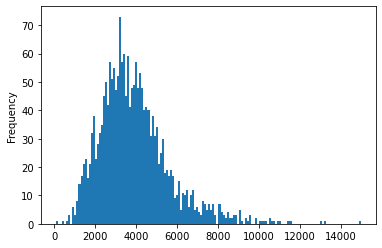

In [525]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sentiment_df['length'].plot.hist(bins=150)

In [526]:
sentiment_df['length'].describe()

count     2000.000000
mean      3892.002000
std       1712.425852
min         90.000000
25%       2736.750000
50%       3621.500000
75%       4719.250000
max      14956.000000
Name: length, dtype: float64

array([<AxesSubplot:title={'center':'Neg'}>,
       <AxesSubplot:title={'center':'Pos'}>], dtype=object)

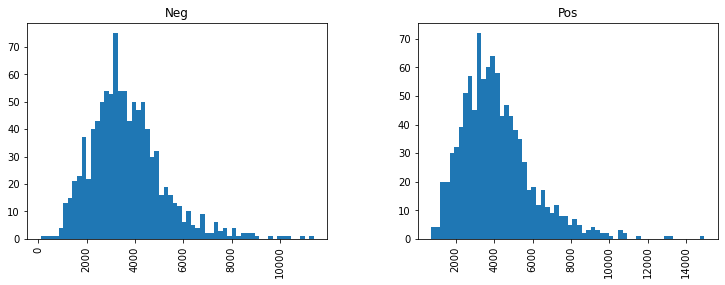

In [527]:
sentiment_df.hist(column='length', by='sentiment', bins=60, figsize=(12,4))

In [528]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    1. Remove punc
    2. Remove stop words
    3. Return list of clean text words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [529]:
sentiment_df
sentiment_df.reset_index(inplace=True)
sentiment_df = sentiment_df[['sentiment', 'comment']]

In [530]:
sentiment_df

,sentiment,comment
0,Neg,"plot : two teen couples go to a church party ,..."
1,Neg,the happy bastard's quick movie review damn t...
2,Neg,it is movies like these that make a jaded movi...
3,Neg,""" quest for camelot "" is warner bros . ' firs..."
4,Neg,synopsis : a mentally unstable man undergoing ...
...,...,...
1995,Pos,wow ! what a movie . it's everything a movie ...
1996,Pos,"richard gere can be a commanding actor , but h..."
1997,Pos,"glory--starring matthew broderick , denzel was..."
1998,Pos,steven spielberg's second epic film on world w...


In [532]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

comment_train, comment_test, label_train, label_test = train_test_split(sentiment_df['comment'],
                                                                        sentiment_df['sentiment'],
                                                                       test_size=0.3)

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

pipeline.fit(comment_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000016CEDBDD1F0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [533]:
predictions = pipeline.predict(comment_test)

In [534]:
from sklearn.metrics import classification_report
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         Neg       0.73      0.88      0.80       288
         Pos       0.86      0.71      0.78       312

    accuracy                           0.79       600
   macro avg       0.80      0.79      0.79       600
weighted avg       0.80      0.79      0.79       600



In [591]:
#test predictions
d = {'comment': ["loved this movie", "hated movie", "felt indifferent about this movie", "kinda meh", "don't watch this"]}
df_test = pd.DataFrame(data=d)

predictions = pipeline.predict(df['Lemma'])
predictions_prob = pipeline.predict_proba(df['Lemma'])

print(predictions)
print(predictions_prob)

['Neg' 'Neg' 'Neg' ... 'Neg' 'Neg' 'Neg']
[[0.54983617 0.45016383]
 [0.52709557 0.47290443]
 [0.58804386 0.41195614]
 ...
 [0.57491783 0.42508217]
 [0.55118642 0.44881358]
 [0.50857143 0.49142857]]


In [592]:
#actual predictions
df_predictions = pd.DataFrame(predictions, columns=['Sentiment'])
df_predictions_prob = pd.DataFrame(predictions_prob, columns=['Neg', 'Pos'])

In [593]:
df_predictions

,Sentiment
0,Neg
1,Neg
2,Neg
3,Pos
4,Neg
...,...
967644,Neg
967645,Pos
967646,Neg
967647,Neg


In [594]:
df_predictions_prob

,Neg,Pos
0,0.549836,0.450164
1,0.527096,0.472904
2,0.588044,0.411956
3,0.466466,0.533534
4,0.582743,0.417257
...,...,...
967644,0.565005,0.434995
967645,0.497229,0.502771
967646,0.574918,0.425082
967647,0.551186,0.448814


In [595]:
df_full_predictions = pd.concat([df_predictions,df_predictions_prob], axis=1)

In [597]:
df_full_predictions.to_excel('df_full_predictions_ai.xlsx')

**Export Dataset**

In [90]:
df.to_excel('df_yt_comments_sentiment.xlsx')

In [606]:
df.shape

(967649, 19)

**Summarizing YouTube Comments**

In [610]:
df = pd.read_excel('C:\\Users\\sans-\\Downloads\\FYP\\df_yt_comments_sentiment.xlsx')
# df = df.drop('Unnamed: 0', axis=1)

# cols = ['tconst', 'Video ID']
# df.loc[:,cols] = df.loc[:,cols].ffill()

In [611]:
df.head()

,Unnamed: 0,Comments,Comment ID,Reply Count,Like Count,from,tconst,vid_id,Comment_EmojiText,Cleaned Comments,...,POS tagged,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis,AI Sentiment,AI Neg,AI Pos
0,0,So excited for this!! 💥💥,UgyCM8SdiQwxnHaCVUN4AaABAg,74,5233,YT_Comments_14PeaksNothingIsImpossible_2021,tt14079374,8QH5hBOoz08,So excited for this!! collision collision,so excited for this collision collision,...,"[('excited', 'a'), ('collision', 'n'), ('colli...",excited collision collision,0.7500,0.3750,Positive,-0.3818,Neutral,Neg,0.549836,0.450164
1,1,"""If this was done by some western climbers the...",UgzyIGWzjPP1uwzU_Dp4AaABAg,8,621,YT_Comments_14PeaksNothingIsImpossible_2021,tt14079374,8QH5hBOoz08,"""If this was done by some western climbers the...",if this was done by some western climbers the...,...,"[('done', 'v'), ('western', 'a'), ('climbers',...",do western climber news time big line touch ...,0.0500,0.0000,Neutral,0.6369,Positive,Neg,0.527096,0.472904
2,2,Hats off to Netflix. They are producing movies...,UgzAiQWqPedTeZZPLYV4AaABAg,21,1486,YT_Comments_14PeaksNothingIsImpossible_2021,tt14079374,8QH5hBOoz08,Hats off to Netflix. They are producing movies...,hats off to netflix they are producing movies ...,...,"[('hats', 'n'), ('netflix', 'v'), ('producing'...",hat netflix produce movie series place count...,0.3500,0.0000,Neutral,-0.5559,Negative,Neg,0.588044,0.411956
3,3,“Giving up is not in the blood Sir” what a hea...,UgwzD8VFUaXF0m3OMuF4AaABAg,10,1004,YT_Comments_14PeaksNothingIsImpossible_2021,tt14079374,8QH5hBOoz08,“Giving up is not in the blood Sir” what a hea...,giving up is not in the blood sir what a hear...,...,"[('giving', 'v'), ('blood', 'n'), ('sir', 'a')...",give blood sir heart touch wow,1.0000,0.1000,Positive,0.8402,Positive,Pos,0.466466,0.533534
4,4,"He did Everest, took that viral photo and then...",UgxbRXDXuCp-QsqGz694AaABAg,2,202,YT_Comments_14PeaksNothingIsImpossible_2021,tt14079374,8QH5hBOoz08,"He did Everest, took that viral photo and then...",he did everest took that viral photo and then ...,...,"[('everest', 'a'), ('took', 'v'), ('viral', 'a...",everest take viral photo climb two close mou...,0.9175,0.0375,Positive,0.0000,Neutral,Neg,0.582743,0.417257


In [612]:
df[['tconst', 'Cleaned Comments', 'Lemma', 
    'Subjectivity', 'Polarity', 'Analysis', 
    'Vader Sentiment', 'Vader Analysis',
   'AI Sentiment', 'AI Neg', 'AI Pos']]

,tconst,Cleaned Comments,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis,AI Sentiment,AI Neg,AI Pos
0,tt14079374,so excited for this collision collision,excited collision collision,0.7500,0.3750,Positive,-0.3818,Neutral,Neg,0.549836,0.450164
1,tt14079374,if this was done by some western climbers the...,do western climber news time big line touch ...,0.0500,0.0000,Neutral,0.6369,Positive,Neg,0.527096,0.472904
2,tt14079374,hats off to netflix they are producing movies ...,hat netflix produce movie series place count...,0.3500,0.0000,Neutral,-0.5559,Negative,Neg,0.588044,0.411956
3,tt14079374,giving up is not in the blood sir what a hear...,give blood sir heart touch wow,1.0000,0.1000,Positive,0.8402,Positive,Pos,0.466466,0.533534
4,tt14079374,he did everest took that viral photo and then ...,everest take viral photo climb two close mou...,0.9175,0.0375,Positive,0.0000,Neutral,Neg,0.582743,0.417257
...,...,...,...,...,...,...,...,...,...,...,...
967644,tt1560220,i saw it,saw,0.0000,0.0000,Neutral,0.0000,Neutral,Neg,0.565005,0.434995
967645,tt1560220,look how far marty has come rust would b so pr...,look far marty come rust would b proud,1.0000,0.4500,Positive,0.4767,Neutral,Pos,0.497229,0.502771
967646,tt1560220,too much comedy,much comedy,0.2000,0.2000,Positive,0.3612,Neutral,Neg,0.574918,0.425082
967647,tt1560220,i do love when the gang get back together one ...,love gang get back together one,0.3000,0.2500,Positive,0.6369,Positive,Neg,0.551186,0.448814


In [613]:
df_yt_comments_sentiment_summarized = df.groupby(['tconst']).mean()
df_yt_comments_sentiment_summarized.to_excel('df_yt_comments_sentiment_summarized.xlsx')

# **Importing Data from Rapid API**


Reference: Chen, K. (2021). Predicting IMDb Ratings of New Movies. Web Mining [IS688, Spring 2021].

In [102]:
import requests
import json
import traceback
import unicodedata

#to remove control characters to prevent JSON decode errors
def remove_control_characters(s):
    return "".join(ch for ch in s if unicodedata.category(ch)[0]!="C" and ch!='\\')


url = "https://movie-database-imdb-alternative.p.rapidapi.com/"

headers = {
    'x-rapidapi-key': 'removed for security reasons',
    'x-rapidapi-host': "movie-database-imdb-alternative.p.rapidapi.com"
    }

#using IMDb ID
title_id_lst = list(df_imdb['tconst'])

json_list = []
error_title_IDs = []

#making the API calls
for title_ID in title_id_lst:
    querystring = {"i":title_ID,"r":"json"}
    
    try:
        response = requests.request("GET", url, headers=headers, params=querystring)
        json_list.append(response.json())
    except:
        try:
            json_list.append(json.loads(remove_control_characters(response.text)))
        except:
            error_title_IDs.append(title_ID)
            print(title_ID, traceback.format_exc())
    
#creating the RapidAPI dataset
df_rapidapi = pd.DataFrame(json_list)
df_rapidapi.to_csv('RapidAPI_Movies.csv',index=False)

tt4439620 Traceback (most recent call last):
  File "C:\Users\sans-\AppData\Local\Temp/ipykernel_8708/1726636044.py", line 29, in <module>
    json_list.append(json.loads(remove_control_characters(response.text)))
  File "C:\Users\sans-\anaconda3\lib\json\__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "C:\Users\sans-\anaconda3\lib\json\decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "C:\Users\sans-\anaconda3\lib\json\decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)



In [103]:
df_rapidapi.head()

,Title,Year,Rated,Released,Runtime,Genre,Director,Writer,Actors,Plot,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,14 Peaks: Nothing Is Impossible,2021,TV-MA,29 Nov 2021,101 min,"Documentary, Adventure, Sport",Torquil Jones,"Gabriel Clarke, Torquil Jones","Nirmal Purja, Suchi Purja, Klára Kolouchová",Fearless Nepali mountaineer Nirmal Purja embar...,...,N/A,7.8,"20,708",tt14079374,movie,29 Nov 2021,N/A,N/A,N/A,True
1,1917,2019,R,10 Jan 2020,119 min,"Action, Drama, War",Sam Mendes,"Sam Mendes, Krysty Wilson-Cairns","Dean-Charles Chapman, George MacKay, Daniel Mays","April 6th, 1917. As an infantry battalion asse...",...,78,8.3,"533,349",tt8579674,movie,25 Dec 2019,"$159,227,644",N/A,N/A,True
2,1BR,2019,TV-MA,24 Apr 2020,90 min,"Drama, Horror, Thriller",David Marmor,David Marmor,"Nicole Brydon Bloom, Giles Matthey, Taylor Nic...","Sarah tries to start anew in LA, but her neigh...",...,56,5.8,"11,416",tt7541106,movie,24 Apr 2020,N/A,N/A,N/A,True
3,21 Bridges,2019,R,22 Nov 2019,99 min,"Action, Thriller",Brian Kirk,"Adam Mervis, Matthew Michael Carnahan","Chadwick Boseman, Sienna Miller, J.K. Simmons",An embattled NYPD detective is thrust into a c...,...,51,6.6,"61,574",tt8688634,movie,22 Nov 2019,"$28,539,757",N/A,N/A,True
4,365 Days,2020,TV-MA,07 Jun 2020,114 min,"Drama, Romance","Barbara Bialowas, Tomasz Mandes","Tomasz Klimala, Tomasz Mandes, Barbara Bialowas","Anna Maria Sieklucka, Michele Morrone, Bronisl...",Massimo is a member of the Sicilian Mafia fami...,...,N/A,3.3,"73,032",tt10886166,movie,11 Jun 2020,N/A,N/A,N/A,True


In [104]:
df_rapidapi.shape

(711, 25)

# **Importing Data from TMDB**


Reference: Chen, K. (2021). Predicting IMDb Ratings of New Movies. Web Mining [IS688, Spring 2021].

In [106]:
import tmdbsimple as tmdb
import requests

#setting up keys and response url
tmdb.API_KEY = 'removed for security reasons'

json_list2 = []

response = requests.get('removed for security reasons')
tmdb_dataset = response.json()['movie_results']
tmdb_dataset

[{'original_language': 'en',
  'original_title': '8-Bit Christmas',
  'poster_path': '/5YwaISdOwp8Zu6O7kwBeUn8a7Pu.jpg',
  'title': '8-Bit Christmas',
  'id': 802217,
  'overview': 'In suburban Chicago during the late 1980s, ten-year-old Jake Doyle embarks on a herculean quest to get the latest and greatest video game system for Christmas.',
  'release_date': '2021-11-24',
  'vote_count': 200,
  'vote_average': 6.5,
  'adult': False,
  'backdrop_path': '/vDSasKnGHsRfX0kTAu5rTl0TQzG.jpg',
  'video': False,
  'genre_ids': [10751, 35],
  'popularity': 48.439}]

In [124]:
json_list = []
error_list = []

title_id_lst = list(df_imdb['tconst'])

#retrieving TMDB IDs and linking it with IMDB ID

for title_ID in title_id_lst:
    
    url = 'removed for security reasons'.format(title_ID)
    response = requests.get(url)
    
    try:
        info = response.json()['movie_results']
        json_list.append(info)
    except:
        error_list.append(title_ID,traceback.format_exc())
        print(tmdb_ID,traceback.format_exc())
        
tmdb_df = pd.DataFrame(json_list)
tmdb_df = pd.DataFrame.from_records(tmdb_df[0].dropna().tolist())
tmdb_df.to_csv('tmdb.csv', index=False)

In [125]:
tmdb_IDs = list(tmdb_df['id'])

json_list = []
error_list = []

#using TMDB ID to get the details from the database

for tmdb_ID in tmdb_IDs:
    url = 'removed for security reasons'.format(tmdb_ID)
    response = requests.get(url)
    try:
        json_list.append(response.json())
    except:
        error_list.append(tmdb_ID,traceback.format_exc())
        print(tmdb_ID,traceback.format_exc())
tmdb_df2 = pd.DataFrame(json_list)
tmdb_df2.to_csv('tmdb2.csv', index=False)

# **1st Merging**

In [127]:
df_imdb

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Video ID,CommentRef,Status
28,tt14079374,8.0,12934,movie,14 Peaks: Nothing Is Impossible,14 Peaks: Nothing Is Impossible,0,2021,\N,101,"Adventure,Documentary,Sport",8QH5hBOoz08,YT_Comments_14PeaksNothingIsImpossible_2021,Generated
29,tt8579674,8.3,514903,movie,1917,1917,0,2019,\N,119,"Action,Drama,War",YqNYrYUiMfg,YT_Comments_1917_2019.xlsx,Generated
32,tt7541106,5.8,11098,movie,1BR,1BR,0,2019,\N,90,"Drama,Horror,Thriller",W1TCaha4zbk,YT_Comments_1BR_2019.xlsx,Generated
37,tt8688634,6.6,60198,movie,21 Bridges,21 Bridges,0,2019,\N,99,"Action,Thriller",BVZDhunTrYA,YT_Comments_21Bridges_2019.xlsx,Generated
58,tt10886166,3.3,70942,movie,365 Days,365 dni,0,2020,\N,114,"Drama,Romance",SnlYa90KExE,YT_Comments_365Days_2020.xlsx,Generated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22490,tt8949056,6.1,13518,movie,"Yes, God, Yes","Yes, God, Yes",0,2019,\N,78,"Comedy,Drama",DKqtR9tMyCM,YT_Comments_YesGodYes_2019.xlsx,Generated
22807,tt8079248,6.8,141605,movie,Yesterday,Yesterday,0,2019,\N,116,"Comedy,Fantasy,Music",Ry9honCV3qc,YT_Comments_Yesterday_2019.xlsx,Generated
22848,tt8201852,5.4,19350,movie,You Should Have Left,You Should Have Left,0,2020,\N,93,"Horror,Thriller",5J5RPNsPyWI,YT_Comments_YouShouldHaveLeft_2020.xlsx,Generated
22953,tt12361974,8.1,350601,movie,Zack Snyder's Justice League,Zack Snyder's Justice League,0,2021,\N,242,"Action,Adventure,Fantasy",vM-Bja2Gy04,YT_Comments_Zack_Snyders_Justice_League_2021,Generated


In [614]:
df_yt_comments_sentiment_summarized = pd.read_excel('C:\\Users\\sans-\\Downloads\\FYP\\df_yt_comments_sentiment_summarized.xlsx')

In [615]:
df_yt_comments_sentiment_summarized

,tconst,Unnamed: 0,Reply Count,Like Count,Subjectivity,Polarity,Vader Sentiment,AI Neg,AI Pos
0,tt0293429,505836.5,2.833000,143.658000,0.329743,0.103234,0.137855,0.549452,0.450548
1,tt0385887,509442.0,0.494633,15.888522,0.372278,0.172964,0.255366,0.516076,0.483924
2,tt0437086,33165.5,1.002500,33.821500,0.364837,0.240607,0.371664,0.525917,0.474083
3,tt0441881,189627.0,0.882129,9.806084,0.271233,0.143531,0.106058,0.504464,0.495536
4,tt0448115,633496.5,2.165000,83.021500,0.359814,0.204025,0.351615,0.532443,0.467557
...,...,...,...,...,...,...,...,...,...
707,tt9860728,247433.5,0.343500,29.878500,0.383120,0.173203,0.340782,0.540805,0.459195
708,tt9866072,332681.0,0.378378,22.763807,0.328241,0.140609,0.273393,0.536384,0.463616
709,tt9893250,357594.5,0.686500,30.802000,0.415343,0.097810,0.128159,0.544703,0.455297
710,tt9898858,162994.0,0.993327,18.870353,0.402703,0.086366,0.138753,0.540812,0.459188


In [621]:
df = df_imdb.merge(df_yt_comments_sentiment_summarized, left_on='tconst', right_on='tconst')

In [622]:
df

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,CommentRef,Status,Unnamed: 0,Reply Count,Like Count,Subjectivity,Polarity,Vader Sentiment,AI Neg,AI Pos
0,tt14079374,8.0,12934,movie,14 Peaks: Nothing Is Impossible,14 Peaks: Nothing Is Impossible,0,2021,\N,101,...,YT_Comments_14PeaksNothingIsImpossible_2021,Generated,999.5,0.390500,17.915000,0.372701,0.181927,0.414775,0.508847,0.491153
1,tt8579674,8.3,514903,movie,1917,1917,0,2019,\N,119,...,YT_Comments_1917_2019.xlsx,Generated,2999.5,1.816000,82.334500,0.371200,0.224335,0.248756,0.501200,0.498800
2,tt7541106,5.8,11098,movie,1BR,1BR,0,2019,\N,90,...,YT_Comments_1BR_2019.xlsx,Generated,4151.0,1.617162,19.102310,0.408889,0.043383,0.050205,0.553093,0.446907
3,tt8688634,6.6,60198,movie,21 Bridges,21 Bridges,0,2019,\N,99,...,YT_Comments_21Bridges_2019.xlsx,Generated,5302.5,0.441500,24.310500,0.296228,0.090962,0.123517,0.525866,0.474134
4,tt10886166,3.3,70942,movie,365 Days,365 dni,0,2020,\N,114,...,YT_Comments_365Days_2020.xlsx,Generated,6670.0,0.529252,12.346939,0.242191,0.081055,0.205805,0.533989,0.466011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,tt8949056,6.1,13518,movie,"Yes, God, Yes","Yes, God, Yes",0,2019,\N,78,...,YT_Comments_YesGodYes_2019.xlsx,Generated,961262.5,1.365297,24.155251,0.317060,0.086769,0.196951,0.524243,0.475757
708,tt8079248,6.8,141605,movie,Yesterday,Yesterday,0,2019,\N,116,...,YT_Comments_Yesterday_2019.xlsx,Generated,962376.5,0.879888,28.609497,0.332158,0.111637,0.205466,0.532961,0.467039
709,tt8201852,5.4,19350,movie,You Should Have Left,You Should Have Left,0,2020,\N,93,...,YT_Comments_YouShouldHaveLeft_2020.xlsx,Generated,963460.5,1.063492,12.912698,0.398763,0.074261,0.062718,0.555437,0.444563
710,tt12361974,8.1,350601,movie,Zack Snyder's Justice League,Zack Snyder's Justice League,0,2021,\N,242,...,YT_Comments_Zack_Snyders_Justice_League_2021,Generated,964649.5,4.268000,216.870500,0.240978,0.109389,0.233916,0.515656,0.484344


In [132]:
df_rapidapi = df_rapidapi[['imdbID', 'Rated', 'Released', 'Director', 'Writer', 'Actors', 'Plot', 
'Language', 'Country', 'Awards', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 
'DVD', 'BoxOffice']]

In [133]:
df_rapidapi.head()

,imdbID,Rated,Released,Director,Writer,Actors,Plot,Language,Country,Awards,Ratings,Metascore,imdbRating,imdbVotes,DVD,BoxOffice
0,tt14079374,TV-MA,29 Nov 2021,Torquil Jones,"Gabriel Clarke, Torquil Jones","Nirmal Purja, Suchi Purja, Klára Kolouchová",Fearless Nepali mountaineer Nirmal Purja embar...,"English, Nepali","United Kingdom, United States",1 nomination,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,7.8,"20,708",29 Nov 2021,N/A
1,tt8579674,R,10 Jan 2020,Sam Mendes,"Sam Mendes, Krysty Wilson-Cairns","Dean-Charles Chapman, George MacKay, Daniel Mays","April 6th, 1917. As an infantry battalion asse...","English, French, German","United Kingdom, United States, India, Spain",Won 3 Oscars. 135 wins & 206 nominations total,"[{'Source': 'Internet Movie Database', 'Value'...",78,8.3,"533,349",25 Dec 2019,"$159,227,644"
2,tt7541106,TV-MA,24 Apr 2020,David Marmor,David Marmor,"Nicole Brydon Bloom, Giles Matthey, Taylor Nic...","Sarah tries to start anew in LA, but her neigh...",English,United States,2 wins & 2 nominations,"[{'Source': 'Internet Movie Database', 'Value'...",56,5.8,"11,416",24 Apr 2020,N/A
3,tt8688634,R,22 Nov 2019,Brian Kirk,"Adam Mervis, Matthew Michael Carnahan","Chadwick Boseman, Sienna Miller, J.K. Simmons",An embattled NYPD detective is thrust into a c...,English,"China, United States",2 nominations,"[{'Source': 'Internet Movie Database', 'Value'...",51,6.6,"61,574",22 Nov 2019,"$28,539,757"
4,tt10886166,TV-MA,07 Jun 2020,"Barbara Bialowas, Tomasz Mandes","Tomasz Klimala, Tomasz Mandes, Barbara Bialowas","Anna Maria Sieklucka, Michele Morrone, Bronisl...",Massimo is a member of the Sicilian Mafia fami...,"Polish, English, Italian",Poland,1 win & 5 nominations,"[{'Source': 'Internet Movie Database', 'Value'...",N/A,3.3,"73,032",11 Jun 2020,N/A


In [623]:
df_rapidapi = pd.read_csv('RapidAPI_Movies.csv')

df = df.merge(df_rapidapi, left_on='tconst', right_on='imdbID')
df

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,Metascore,imdbRating,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response
0,tt14079374,8.0,12934,movie,14 Peaks: Nothing Is Impossible,14 Peaks: Nothing Is Impossible,0,2021,\N,101,...,NaN,7.8,"20,708",tt14079374,movie,29 Nov 2021,NaN,NaN,NaN,True
1,tt8579674,8.3,514903,movie,1917,1917,0,2019,\N,119,...,78.0,8.3,"533,349",tt8579674,movie,25 Dec 2019,"$159,227,644",NaN,NaN,True
2,tt7541106,5.8,11098,movie,1BR,1BR,0,2019,\N,90,...,56.0,5.8,"11,416",tt7541106,movie,24 Apr 2020,NaN,NaN,NaN,True
3,tt8688634,6.6,60198,movie,21 Bridges,21 Bridges,0,2019,\N,99,...,51.0,6.6,"61,574",tt8688634,movie,22 Nov 2019,"$28,539,757",NaN,NaN,True
4,tt10886166,3.3,70942,movie,365 Days,365 dni,0,2020,\N,114,...,NaN,3.3,"73,032",tt10886166,movie,11 Jun 2020,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,tt8949056,6.1,13518,movie,"Yes, God, Yes","Yes, God, Yes",0,2019,\N,78,...,71.0,6.1,"14,049",tt8949056,movie,28 Jul 2020,NaN,NaN,NaN,True
707,tt8079248,6.8,141605,movie,Yesterday,Yesterday,0,2019,\N,116,...,55.0,6.8,"145,606",tt8079248,movie,10 Sep 2019,"$73,286,650",NaN,NaN,True
708,tt8201852,5.4,19350,movie,You Should Have Left,You Should Have Left,0,2020,\N,93,...,46.0,5.4,"19,849",tt8201852,movie,19 Jun 2020,NaN,NaN,NaN,True
709,tt12361974,8.1,350601,movie,Zack Snyder's Justice League,Zack Snyder's Justice League,0,2021,\N,242,...,54.0,8.1,"359,713",tt12361974,movie,NaN,NaN,NaN,NaN,True


In [135]:
tmdb_df2.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/lRCAcwJeh93YHO3ghFBDf0Pj3w3.jpg,None,0,"[{'id': 99, 'name': 'Documentary'}]",,890825,tt14079374,en,14 Peaks: Nothing Is Impossible,...,2021-11-12,0,101,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,,14 Peaks: Nothing Is Impossible,False,7.5,154
1,False,/2lBOQK06tltt8SQaswgb8d657Mv.jpg,None,100000000,"[{'id': 10752, 'name': 'War'}, {'id': 18, 'nam...",https://www.1917.movie/,530915,tt8579674,en,1917,...,2019-12-25,374733942,119,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Time is the enemy,1917,False,8.0,9466
2,False,/6CyILXa0BOm6HtV4naOjg5B2RRZ.jpg,None,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",,611605,tt7541106,en,1BR,...,2019-07-18,0,90,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Welcome to the neighborhood.,1BR,False,6.2,271
3,False,/5KmhjlR5CEarB8mKtpjcjHRYIu9.jpg,None,33000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",https://www.21bridges.movie,535292,tt8688634,en,21 Bridges,...,2019-10-24,49939757,99,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The only way out is through him,21 Bridges,False,6.8,1491
4,False,/27nn2YJBwY7a1etZ0AiIcOrIgu3.jpg,"{'id': 829561, 'name': '365 Days Collection', ...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",,664413,tt10886166,pl,365 dni,...,2020-02-07,9458590,116,"[{'english_name': 'Polish', 'iso_639_1': 'pl',...",Released,,365 Days,False,7.0,6542


In [624]:
tmdb_df2 = pd.read_csv('tmdb2.csv')

tmdb_df2 = tmdb_df2[['imdb_id', 'budget', 'revenue', 'popularity', 'production_companies', 'production_countries', 
 'spoken_languages', 'tagline', 'vote_average', 'vote_count']]

In [625]:
df = df.merge(tmdb_df2, left_on='tconst', right_on='imdb_id')
df

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,imdb_id,budget,revenue,popularity,production_companies,production_countries,spoken_languages,tagline,vote_average,vote_count
0,tt14079374,8.0,12934,movie,14 Peaks: Nothing Is Impossible,14 Peaks: Nothing Is Impossible,0,2021,\N,101,...,tt14079374,0,0,43.166,"[{'id': 116323, 'logo_path': None, 'name': 'Li...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...",NaN,7.5,154
1,tt8579674,8.3,514903,movie,1917,1917,0,2019,\N,119,...,tt8579674,100000000,374733942,49.032,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...","[{'english_name': 'English', 'iso_639_1': 'en'...",Time is the enemy,8.0,9466
2,tt7541106,5.8,11098,movie,1BR,1BR,0,2019,\N,90,...,tt7541106,0,0,17.610,"[{'id': 133404, 'logo_path': None, 'name': 'Ma...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...",Welcome to the neighborhood.,6.2,271
3,tt8688634,6.6,60198,movie,21 Bridges,21 Bridges,0,2019,\N,99,...,tt8688634,33000000,49939757,35.794,"[{'id': 106544, 'logo_path': None, 'name': 'AG...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...",The only way out is through him,6.8,1491
4,tt10886166,3.3,70942,movie,365 Days,365 dni,0,2020,\N,114,...,tt10886166,0,9458590,54.204,"[{'id': 113069, 'logo_path': None, 'name': 'Ek...","[{'iso_3166_1': 'PL', 'name': 'Poland'}]","[{'english_name': 'Polish', 'iso_639_1': 'pl',...",NaN,7.0,6542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,tt8949056,6.1,13518,movie,"Yes, God, Yes","Yes, God, Yes",0,2019,\N,78,...,tt8949056,0,0,35.829,"[{'id': 41641, 'logo_path': None, 'name': 'Mai...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[{'english_name': 'English', 'iso_639_1': 'en'...",Being bad has never felt so good.,6.4,355
705,tt8079248,6.8,141605,movie,Yesterday,Yesterday,0,2019,\N,116,...,tt8079248,26000000,88092097,23.835,"[{'id': 10163, 'logo_path': '/16KWBMmfPX0aJzDE...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]","[{'english_name': 'English', 'iso_639_1': 'en'...",Everyone in the world has forgotten The Beatle...,6.7,3066
706,tt8201852,5.4,19350,movie,You Should Have Left,You Should Have Left,0,2020,\N,93,...,tt8201852,0,0,34.520,"[{'id': 3172, 'logo_path': '/kDedjRZwO8uyFhuHa...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...",The house finds you,5.9,447
707,tt12361974,8.1,350601,movie,Zack Snyder's Justice League,Zack Snyder's Justice League,0,2021,\N,242,...,tt12361974,70000000,657000000,364.503,"[{'id': 174, 'logo_path': '/IuAlhI9eVC9Z8UQWOI...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...",NaN,8.3,7420


**Export for Prediction Model**

In [626]:
df.to_excel('FinalDataset.xlsx')

# **Twitter Dataset**

In [28]:
import tweepy
# your bearer token
MY_BEARER_TOKEN = "removed for security purposes"

# create your client 
client = tweepy.Client(bearer_token=MY_BEARER_TOKEN)

In [103]:
tweethandles_df = pd.read_excel('C:\\Users\\sans-\\Downloads\\FYP\\CompiledActors.xlsx')

In [104]:
tweet_handles = tweethandles_df['Twitter'].dropna()
tweet_handles = list(tweet_handles)

In [131]:
tweet_handles[784:]

['SilambarasanTR_',
 'taapsee',
 'TaikaWaititi',
 'taliaryder',
 'ttbate',
 'tarasutaria',
 'mstarawestwood',
 'tarajiphenson',
 'TaronEgerton',
 'taylor_nichols7',
 'tayschilling',
 'taylorswift13',
 'tenochhuerta',
 'tenzingtrainor',
 'littlegardenhig',
 'terryserpico',
 'TessaThompson_x',
 'teyonahparris',
 'ThandiweNewton',
 'thodorepelleri2',
 'thethomasdekker',
 'tinband',
 'ThomasJane',
 'thomasturgoose',
 'TiffanyHaddish',
 'iTIGERSHROFF',
 'ofctimallen',
 'tim_matheson',
 'timrobbins1',
 'RealChalamet',
 'timothycsimons',
 'timvmurphy',
 'titoortiz',
 'thetobywallace',
 'tglynncarney',
 'tomhanks',
 'TomHolland1996',
 'tomwaits',
 'tommyflanagan',
 'tonyjaaofficial',
 'tosincole',
 '_Trevante_',
 'dyrholmtrine',
 'tripti_dimri23',
 'tristanharris',
 'tsubasa_honda',
 'tylerhoechlin',
 'Tyrese',
 'umathurman',
 'vaaniofficial',
 'VanessaHudgens',
 'VanessaKirby',
 'Varun_dvn',
 'varunsharma90',
 'VeraFarmiga',
 'vickykaushal09',
 'alcockvicky',
 'vidya_balan',
 'vidyutjammwal',

In [132]:
twitterProfiles = []

In [670]:
twitterProfiles = tweet_handles[784:]
twitterInfo = []
#twitterFollowerCount = []

for i in client.get_users(usernames=twitterProfiles, user_fields=["public_metrics"]).data:
    twitterInfo.append(i)
    #twitterFollowerCount.append(i.public_metrics['followers_count'])

In [673]:
twitter_df = pd.DataFrame (twitterInfo)
twitter_df.to_csv('Twitter_DF_TZ.csv')

# Data Cleaning

In [31]:
df = pd.read_excel('C:\\Users\\sans-\\Downloads\\FYP\\FinalDataset.xlsx')

In [32]:
df.shape

(709, 60)

**Social Media Engineering**

In [33]:
df[['Actor1', 'Actor2', 'Actor3']] = df['Actors'].str.split(',', expand=True)

df['Actor1'] = df['Actor1'].str.strip()
df['Actor2'] = df['Actor2'].str.strip()
df['Actor3'] = df['Actor3'].str.strip()

In [34]:
df.head()

,Unnamed: 0,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,...,popularity,production_companies,production_countries,spoken_languages,tagline,vote_average,vote_count,Actor1,Actor2,Actor3
0,0,tt14079374,8.0,12934,movie,14 Peaks: Nothing Is Impossible,14 Peaks: Nothing Is Impossible,0,2021,\N,...,43.166,"[{'id': 116323, 'logo_path': None, 'name': 'Li...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...",NaN,7.5,154,Nirmal Purja,Suchi Purja,Klára Kolouchová
1,1,tt8579674,8.3,514903,movie,1917,1917,0,2019,\N,...,49.032,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...","[{'english_name': 'English', 'iso_639_1': 'en'...",Time is the enemy,8.0,9466,Dean-Charles Chapman,George MacKay,Daniel Mays
2,2,tt7541106,5.8,11098,movie,1BR,1BR,0,2019,\N,...,17.610,"[{'id': 133404, 'logo_path': None, 'name': 'Ma...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...",Welcome to the neighborhood.,6.2,271,Nicole Brydon Bloom,Giles Matthey,Taylor Nichols
3,3,tt8688634,6.6,60198,movie,21 Bridges,21 Bridges,0,2019,\N,...,35.794,"[{'id': 106544, 'logo_path': None, 'name': 'AG...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'english_name': 'English', 'iso_639_1': 'en'...",The only way out is through him,6.8,1491,Chadwick Boseman,Sienna Miller,J.K. Simmons
4,4,tt10886166,3.3,70942,movie,365 Days,365 dni,0,2020,\N,...,54.204,"[{'id': 113069, 'logo_path': None, 'name': 'Ek...","[{'iso_3166_1': 'PL', 'name': 'Poland'}]","[{'english_name': 'Polish', 'iso_639_1': 'pl',...",NaN,7.0,6542,Anna Maria Sieklucka,Michele Morrone,Bronislaw Wroclawski


In [35]:
actors_socialmedia = pd.read_excel('C:\\Users\\sans-\\Downloads\\FYP\\CompiledActors.xlsx')
actors_socialmedia.head()

,SM_Actors,Twitter,Insta Posts,Insta Followers Initial,Calculation,Insta Followers,Insta Following,Twitter followers_count,Twitter following_count,Twitter tweet_count,Twitter listed_count
0,50 Cent,50cent,4550.0,27.9,1000000.0,27900000.0,299.0,12539814.0,29.0,17531.0,30703.0
1,Aaron Paul,aaronpaul_8,486.0,5.2,1000000.0,5200000.0,557.0,2521316.0,530.0,29.0,6228.0
2,Aayush Sharma,NaN,353.0,1.2,1000000.0,1200000.0,51.0,NaN,NaN,NaN,NaN
3,Abbi Jacobson,abbijacobson,1167.0,1.0,1000000.0,1000000.0,858.0,22.0,1.0,0.0,0.0
4,Abdellatif Chaouqi,NaN,124.0,27.3,1000.0,27300.0,1072.0,NaN,NaN,NaN,NaN


In [36]:
#Merging on Actor 1

df = df.merge(right=actors_socialmedia, how='left', left_on='Actor1', right_on='SM_Actors')
df.drop(columns=['SM_Actors', 'Twitter', 'Insta Followers Initial', 'Calculation'], inplace=True)

df.rename(columns={'Insta Posts': 'A1_INS_POST', 
                        'Insta Followers': 'A1_INS_FOLLOWERS',
                        'Insta Following': 'A1_INS_FOLLOWING',
                        'Twitter followers_count': 'A1_TWT_FOLLOWERS',
                        'Twitter following_count': 'A1_TWT_FOLLOWING',
                        'Twitter tweet_count': 'A1_TWT_POST',
                        'Twitter listed_count': 'A1_TWT_LIST'}, 
               inplace=True)

#Merging on Actor 2
df = df.merge(right=actors_socialmedia, how='left', left_on='Actor2', right_on='SM_Actors')
df.drop(columns=['SM_Actors', 'Twitter', 'Insta Followers Initial', 'Calculation'], inplace=True)

df.rename(columns={'Insta Posts': 'A2_INS_POST', 
                        'Insta Followers': 'A2_INS_FOLLOWERS',
                        'Insta Following': 'A2_INS_FOLLOWING',
                        'Twitter followers_count': 'A2_TWT_FOLLOWERS',
                        'Twitter following_count': 'A2_TWT_FOLLOWING',
                        'Twitter tweet_count': 'A2_TWT_POST',
                        'Twitter listed_count': 'A2_TWT_LIST'}, 
               inplace=True)


#Merging on Actor 3
df = df.merge(right=actors_socialmedia, how='left', left_on='Actor3', right_on='SM_Actors')
df.drop(columns=['SM_Actors', 'Twitter', 'Insta Followers Initial', 'Calculation'], inplace=True)

df.rename(columns={'Insta Posts': 'A3_INS_POST', 
                        'Insta Followers': 'A3_INS_FOLLOWERS',
                        'Insta Following': 'A3_INS_FOLLOWING',
                        'Twitter followers_count': 'A3_TWT_FOLLOWERS',
                        'Twitter following_count': 'A3_TWT_FOLLOWING',
                        'Twitter tweet_count': 'A3_TWT_POST',
                        'Twitter listed_count': 'A3_TWT_LIST'}, 
               inplace=True)


df.to_excel('test_final_df.xlsx')

In [37]:
df.columns

Index(['Unnamed: 0', 'tconst', 'averageRating', 'numVotes', 'titleType',
       'primaryTitle', 'originalTitle', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres', 'Video ID', 'CommentRef', 'Status',
       'Unnamed: 0.1', 'Reply Count', 'Like Count', 'Subjectivity', 'Polarity',
       'Vader Sentiment', 'AI Neg', 'AI Pos', 'Title', 'Year', 'Rated',
       'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot',
       'Language', 'Country', 'Awards', 'Won', 'Nominated', 'Poster',
       'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'imdbID', 'Type',
       'DVD', 'BoxOffice', 'Production', 'Website', 'Response', 'imdb_id',
       'budget', 'revenue', 'popularity', 'production_companies',
       'production_countries', 'spoken_languages', 'tagline', 'vote_average',
       'vote_count', 'Actor1', 'Actor2', 'Actor3', 'A1_INS_POST',
       'A1_INS_FOLLOWERS', 'A1_INS_FOLLOWING', 'A1_TWT_FOLLOWERS',
       'A1_TWT_FOLLOWING', 'A1_TWT_POST', 'A1_TWT_LI

In [38]:
df['A1_Post'] = df[['A1_INS_POST', 'A1_TWT_POST']].max(axis=1)
df['A1_Followers'] = df[['A1_INS_FOLLOWERS', 'A1_TWT_FOLLOWERS']].max(axis=1)
df['A1_Following'] = df[['A1_INS_FOLLOWING', 'A1_TWT_FOLLOWING']].max(axis=1)

df['A2_Post'] = df[['A2_INS_POST', 'A2_TWT_POST']].max(axis=1)
df['A2_Followers'] = df[['A2_INS_FOLLOWERS', 'A2_TWT_FOLLOWERS']].max(axis=1)
df['A2_Following'] = df[['A2_INS_FOLLOWING', 'A2_TWT_FOLLOWING']].max(axis=1)

df['A3_Post'] = df[['A3_INS_POST', 'A3_TWT_POST']].max(axis=1)
df['A3_Followers'] = df[['A3_INS_FOLLOWERS', 'A3_TWT_FOLLOWERS']].max(axis=1)
df['A3_Following'] = df[['A3_INS_FOLLOWING', 'A3_TWT_FOLLOWING']].max(axis=1)

In [39]:
df['SM_Posts'] = round(df[['A1_Post', 'A2_Post', 'A3_Post']].mean(axis=1, skipna = True), 2)
df['SM_Followers'] = round(df[['A1_Followers', 'A2_Followers', 'A3_Followers']].mean(axis=1, skipna = True), 2)
df['SM_Following'] = round(df[['A1_Following', 'A2_Following', 'A3_Following']].mean(axis=1, skipna = True), 2)

In [40]:
df.to_excel('test_final_df.xlsx')

**Merging Video Details**

In [41]:
video_df = pd.read_excel('C:\\Users\\sans-\\Downloads\\FYP\\video_stats.xlsx')
df = df.merge(right=video_df, how='left', left_on='Video ID', right_on='id')

In [42]:
df.head()

,Unnamed: 0,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,...,SM_Followers,SM_Following,kind,etag,id,publishedAt,duration,viewCount,likeCount,commentCount
0,0,tt14079374,8.0,12934,movie,14 Peaks: Nothing Is Impossible,14 Peaks: Nothing Is Impossible,0,2021,\N,...,955800.00,408.00,youtube#video,7mWfsA8v2tmAE2BLInBuniLWdvw,8QH5hBOoz08,2021-11-02T15:00:00Z,PT1M55S,3204192.0,99526.0,3730.0
1,1,tt8579674,8.3,514903,movie,1917,1917,0,2019,\N,...,58344.50,867.00,youtube#video,4JIoD8SzAZ_qwxDWO6Uc117hNb4,YqNYrYUiMfg,2019-10-03T20:29:43Z,PT2M32S,27552507.0,200267.0,12813.0
2,2,tt7541106,5.8,11098,movie,1BR,1BR,0,2019,\N,...,21504.33,470.33,youtube#video,IZ_uBUsMh5ty_FgWrJAqlmBJLGM,W1TCaha4zbk,2020-03-17T18:22:08Z,PT2M26S,869368.0,4098.0,832.0
3,3,tt8688634,6.6,60198,movie,21 Bridges,21 Bridges,0,2019,\N,...,6097000.00,95.00,youtube#video,QOOySoVW47Y2U6zINaQR6DWP2NY,BVZDhunTrYA,2019-04-25T13:00:02Z,PT2M37S,6760818.0,67247.0,3351.0
4,4,tt10886166,3.3,70942,movie,365 Days,365 dni,0,2020,\N,...,8150000.00,293.00,youtube#video,gybmg1_XQPWYJm8aOmi-XfIGZ3Y,SnlYa90KExE,2021-03-26T13:21:15Z,PT2M40S,9349711.0,64628.0,1267.0


**Deleting extra columns**

In [43]:
df.drop(columns=['titleType', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'averageRating', 'numVotes',
                 'Video ID', 'CommentRef', 'Status', 'Reply Count', 'Like Count', 
                 'imdbID', 'Plot',
                 'Director', 'Writer', 'Actors', 'DVD',
                 'Awards', 'Ratings', 'Metascore', 
                 'BoxOffice', 'imdb_id', 'budget', 'revenue', 'tagline', 'vote_average', 'vote_count', 
                 'production_companies', 'production_countries', 'spoken_languages',
                 'Actor1', 'Actor2', 'Actor3', 
                 'A1_INS_POST', 'A1_INS_FOLLOWERS', 'A1_INS_FOLLOWING', 
                 'A1_TWT_FOLLOWERS', 'A1_TWT_FOLLOWING', 'A1_TWT_POST', 'A1_TWT_LIST', 
                 'A2_INS_POST', 'A2_INS_FOLLOWERS', 'A2_INS_FOLLOWING', 
                 'A2_TWT_FOLLOWERS', 'A2_TWT_FOLLOWING', 'A2_TWT_POST', 'A2_TWT_LIST', 
                 'A3_INS_POST', 'A3_INS_FOLLOWERS', 'A3_INS_FOLLOWING', 
                 'A3_TWT_FOLLOWERS', 'A3_TWT_FOLLOWING', 'A3_TWT_POST', 'A3_TWT_LIST', 
                 'A1_Post', 'A1_Followers', 'A1_Following', 
                 'A2_Post', 'A2_Followers', 'A2_Following', 
                 'A3_Post', 'A3_Followers', 'A3_Following',
                 'kind', 'etag', 'id'
                ], inplace=True)

In [44]:
values = {'SM_Posts': 0, 'SM_Followers': 0, 'SM_Following': 0, 'likeCount':0}
df.fillna(value=values, inplace=True)

**Delete deleted videos**

In [45]:
df = df[df['tconst'] != 'tt9742794']

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 708
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       708 non-null    int64  
 1   tconst           708 non-null    object 
 2   primaryTitle     708 non-null    object 
 3   runtimeMinutes   708 non-null    int64  
 4   genres           708 non-null    object 
 5   Unnamed: 0.1     708 non-null    float64
 6   Subjectivity     708 non-null    float64
 7   Polarity         708 non-null    float64
 8   Vader Sentiment  708 non-null    float64
 9   AI Neg           708 non-null    float64
 10  AI Pos           708 non-null    float64
 11  Title            708 non-null    object 
 12  Year             708 non-null    int64  
 13  Rated            677 non-null    object 
 14  Released         708 non-null    object 
 15  Runtime          708 non-null    object 
 16  Genre            708 non-null    object 
 17  Language        

**Genre:**

In [47]:
s = df['genres'].str.split(',').explode().str.strip('[] ').value_counts()
s

Drama          387
Action         220
Comedy         218
Adventure      140
Crime          140
Thriller       130
Horror         117
Mystery        110
Romance         75
Biography       59
Sci-Fi          50
Fantasy         48
Animation       37
Family          30
History         28
Documentary     22
Music           16
War             15
Sport           12
Musical          8
Western          5
Name: genres, dtype: int64

In [48]:
# genre_list = ['Adventure','Action','Drama','Comedy','Biography','Crime','Mystery','Documentary','Horror',
# 'Animation','Thriller','Fantasy','Family','Romance','Musical','History','War','Sport','Music','Western','Sci-Fi']

df['Drama'] = np.where(df['genres'].str.contains('Drama', regex=False), 1, 0)
df['Action'] = np.where(df['genres'].str.contains('Action', regex=False), 1, 0)
df['Comedy'] = np.where(df['genres'].str.contains('Comedy', regex=False), 1, 0)
df['Adventure'] = np.where(df['genres'].str.contains('Adventure', regex=False), 1, 0)
df['Crime'] = np.where(df['genres'].str.contains('Crime', regex=False), 1, 0)

#creating a list for all the other genres
searchfor = ['Thriller', 'Horror', 'Mystery', 'Romance', 'Biography', 'Sci-Fi', 'Fantasy', 'Animation', 
            'Family', 'History', 'Documentary', 'Music', 'War', 'Sport', 'Musical', 'Western']

df['Others'] = np.where(df['genres'].str.contains('|'.join(searchfor)), 1, 0)

In [49]:
df['genres'] = df['genres'].astype('string')
df['genres'].value_counts()

Drama,Horror,Mystery          32
Drama                         25
Action,Crime,Drama            24
Comedy,Drama                  23
Adventure,Animation,Comedy    23
                              ..
Fantasy,Mystery,Sci-Fi         1
Adventure,Animation,Drama      1
Adventure,Horror,Sci-Fi        1
Action,Horror,Mystery          1
Comedy,Fantasy,Music           1
Name: genres, Length: 180, dtype: Int64

In [50]:
# Frequency encoding using value_counts function 
Item_Type_freq = df['genres'].value_counts(normalize=True)

# Mapping the encoded values with original data 
df['genres_freq'] = df['genres'].apply(lambda x : Item_Type_freq[x])

print('The sum of genres_freq variable:', sum(Item_Type_freq))
df[['genres', 'genres_freq']]

The sum of genres_freq variable: 0.9999999999999968


,genres,genres_freq
0,"Adventure,Documentary,Sport",0.001412
1,"Action,Drama,War",0.005650
2,"Drama,Horror,Thriller",0.004237
3,"Action,Thriller",0.022599
4,"Drama,Romance",0.022599
...,...,...
704,"Comedy,Drama",0.032486
705,"Comedy,Fantasy,Music",0.001412
706,"Horror,Thriller",0.011299
707,"Action,Adventure,Fantasy",0.021186


**Rated:**

    https://www.filmratings.com/RatingsGuide
    
    Motion Picture Association film rating system:
    G: General Audiences
    PG: Parental Guidance Suggested
    PG-13: Parents Strongly Cautioned
    R: Restricted
    NC-17: No one 17 and under admitted

    Missing/Unrated:
    Null --> Not Rated
    Unrated --> Not Rated

    TV Parental Guidelines:
    TV-14 --> PG-13
    TV-MA --> NC-17
    TV-PG --> PG
    TV-G --> G

    Not Sure:
    MA-17 --> NC-17
    12 --> PG-13
    Approved --> Not Rated

In [51]:
df['Rated'].fillna('Not Rated', inplace=True)

In [52]:
df.replace({'Rated': {'Unrated':'Not Rated', 
                      'TV-14':'PG-13',
                     'TV-MA':'NC-17',
                     'TV-PG':'PG',
                     'TV-G':'G',
                     'MA-17':'NC-17',
                     '12':'PG-13',
                     'Approved':'Not Rated'}}, inplace=True)

In [53]:
df['Rated'] = df['Rated'].astype('category')
df['Rated'].value_counts()

R            259
PG-13        181
Not Rated    100
NC-17         83
PG            77
G              8
Name: Rated, dtype: int64

**Datetime Conversion: Released**

In [54]:
df[['Released']] = df[['Released']].apply(pd.to_datetime)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 708
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       708 non-null    int64         
 1   tconst           708 non-null    object        
 2   primaryTitle     708 non-null    object        
 3   runtimeMinutes   708 non-null    int64         
 4   genres           708 non-null    string        
 5   Unnamed: 0.1     708 non-null    float64       
 6   Subjectivity     708 non-null    float64       
 7   Polarity         708 non-null    float64       
 8   Vader Sentiment  708 non-null    float64       
 9   AI Neg           708 non-null    float64       
 10  AI Pos           708 non-null    float64       
 11  Title            708 non-null    object        
 12  Year             708 non-null    int64         
 13  Rated            708 non-null    category      
 14  Released         708 non-null    datetime6

**imdbVotes**

In [56]:
df['imdbVotes'] = df['imdbVotes'].str.replace(",","")
df['imdbVotes'] = df['imdbVotes'].astype('int')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 708
Data columns (total 44 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       708 non-null    int64         
 1   tconst           708 non-null    object        
 2   primaryTitle     708 non-null    object        
 3   runtimeMinutes   708 non-null    int64         
 4   genres           708 non-null    string        
 5   Unnamed: 0.1     708 non-null    float64       
 6   Subjectivity     708 non-null    float64       
 7   Polarity         708 non-null    float64       
 8   Vader Sentiment  708 non-null    float64       
 9   AI Neg           708 non-null    float64       
 10  AI Pos           708 non-null    float64       
 11  Title            708 non-null    object        
 12  Year             708 non-null    int64         
 13  Rated            708 non-null    category      
 14  Released         708 non-null    datetime6

**Language & Country**

In [58]:
df['Foreign_Language'] = np.where(df['Language'].str.count('English') < 1, 1, 0)
df['Country_Number'] = df['Country'].str.split(pat=",").str.len()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 708
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        708 non-null    int64         
 1   tconst            708 non-null    object        
 2   primaryTitle      708 non-null    object        
 3   runtimeMinutes    708 non-null    int64         
 4   genres            708 non-null    string        
 5   Unnamed: 0.1      708 non-null    float64       
 6   Subjectivity      708 non-null    float64       
 7   Polarity          708 non-null    float64       
 8   Vader Sentiment   708 non-null    float64       
 9   AI Neg            708 non-null    float64       
 10  AI Pos            708 non-null    float64       
 11  Title             708 non-null    object        
 12  Year              708 non-null    int64         
 13  Rated             708 non-null    category      
 14  Released          708 non-

**Financials**

In [60]:
# values = {'Budget': np.NaN, 'OpeningWeekend': np.NaN, 'Gross(US&Canada)': np.NaN, 'Gross(World)': np.NaN}
# df.fillna(value=values, inplace=True)

In [61]:
# #df['Budget'] = df['Budget'].str.strip()

# df['Budget']=df['Budget'].str.replace(',','')
# df['Budget'] = df['Budget'].astype('float')

# df['OpeningWeekend']=df['OpeningWeekend'].str.replace(',','')
# df['OpeningWeekend'] = df['OpeningWeekend'].astype('float')

# df['Gross(US&Canada)']=df['Gross(US&Canada)'].str.replace(',','')
# df['Gross(US&Canada)'] = df['Gross(US&Canada)'].astype('float')

# df['Gross(World)']=df['Gross(World)'].str.replace(',','')
# df['Gross(World)'] = df['Gross(World)'].astype('float')

In [62]:
# df['ROI'] = (df['Gross(World)'] - df['Budget'])/df['Budget']

In [63]:
# values = {'Budget': 0, 'OpeningWeekend': 0, 'Gross(US&Canada)': 0, 'Gross(World)': 0}
# df.fillna(value=values, inplace=True)

In [64]:
df.head()

,Unnamed: 0,tconst,primaryTitle,runtimeMinutes,genres,Unnamed: 0.1,Subjectivity,Polarity,Vader Sentiment,AI Neg,...,commentCount,Drama,Action,Comedy,Adventure,Crime,Others,genres_freq,Foreign_Language,Country_Number
0,0,tt14079374,14 Peaks: Nothing Is Impossible,101,"Adventure,Documentary,Sport",999.5,0.372701,0.181927,0.414775,0.508847,...,3730.0,0,0,0,1,0,1,0.001412,0,2
1,1,tt8579674,1917,119,"Action,Drama,War",2999.5,0.371200,0.224335,0.248756,0.501200,...,12813.0,1,1,0,0,0,1,0.005650,0,4
2,2,tt7541106,1BR,90,"Drama,Horror,Thriller",4151.0,0.408889,0.043383,0.050205,0.553093,...,832.0,1,0,0,0,0,1,0.004237,0,1
3,3,tt8688634,21 Bridges,99,"Action,Thriller",5302.5,0.296228,0.090962,0.123517,0.525866,...,3351.0,0,1,0,0,0,1,0.022599,0,2
4,4,tt10886166,365 Days,114,"Drama,Romance",6670.0,0.242191,0.081055,0.205805,0.533989,...,1267.0,1,0,0,0,0,1,0.022599,0,1


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 708
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        708 non-null    int64         
 1   tconst            708 non-null    object        
 2   primaryTitle      708 non-null    object        
 3   runtimeMinutes    708 non-null    int64         
 4   genres            708 non-null    string        
 5   Unnamed: 0.1      708 non-null    float64       
 6   Subjectivity      708 non-null    float64       
 7   Polarity          708 non-null    float64       
 8   Vader Sentiment   708 non-null    float64       
 9   AI Neg            708 non-null    float64       
 10  AI Pos            708 non-null    float64       
 11  Title             708 non-null    object        
 12  Year              708 non-null    int64         
 13  Rated             708 non-null    category      
 14  Released          708 non-

**Categorizing Ratings**

In [66]:
# create a list of our conditions

#4 conditions
# conditions = [
#     (df['imdbRating'] >= df['imdbRating'].quantile(0.75)),
#     (df['imdbRating'] >= df['imdbRating'].quantile(0.5)) & (df['imdbRating'] < df['imdbRating'].quantile(0.75)),
#     (df['imdbRating'] >= df['imdbRating'].quantile(0.25)) & (df['imdbRating'] < df['imdbRating'].quantile(0.5)),
#     (df['imdbRating'] < df['imdbRating'].quantile(0.25))
#     ]

#2 conditions
conditions = [
    (df['imdbRating'] >= df['imdbRating'].quantile(0.5)),
    (df['imdbRating'] < df['imdbRating'].quantile(0.5))
    ]

# create a list of the values we want to assign for each condition
values = [0,1]

# create a new column and use np.select to assign values to it using our lists as arguments
df['imdbRating_Cat'] = np.select(conditions, values)

# display updated DataFrame
df.head()

,Unnamed: 0,tconst,primaryTitle,runtimeMinutes,genres,Unnamed: 0.1,Subjectivity,Polarity,Vader Sentiment,AI Neg,...,Drama,Action,Comedy,Adventure,Crime,Others,genres_freq,Foreign_Language,Country_Number,imdbRating_Cat
0,0,tt14079374,14 Peaks: Nothing Is Impossible,101,"Adventure,Documentary,Sport",999.5,0.372701,0.181927,0.414775,0.508847,...,0,0,0,1,0,1,0.001412,0,2,0
1,1,tt8579674,1917,119,"Action,Drama,War",2999.5,0.371200,0.224335,0.248756,0.501200,...,1,1,0,0,0,1,0.005650,0,4,0
2,2,tt7541106,1BR,90,"Drama,Horror,Thriller",4151.0,0.408889,0.043383,0.050205,0.553093,...,1,0,0,0,0,1,0.004237,0,1,1
3,3,tt8688634,21 Bridges,99,"Action,Thriller",5302.5,0.296228,0.090962,0.123517,0.525866,...,0,1,0,0,0,1,0.022599,0,2,0
4,4,tt10886166,365 Days,114,"Drama,Romance",6670.0,0.242191,0.081055,0.205805,0.533989,...,1,0,0,0,0,1,0.022599,0,1,1


**Dummy Variables for Rated:**

In [67]:
subgroup = pd.get_dummies(df['Rated'], drop_first=True, prefix='rated')
df = pd.concat([df, subgroup], axis=1)

In [69]:
df.to_excel('test_df.xlsx')

In [70]:
df.columns

Index(['Unnamed: 0', 'tconst', 'primaryTitle', 'runtimeMinutes', 'genres',
       'Unnamed: 0.1', 'Subjectivity', 'Polarity', 'Vader Sentiment', 'AI Neg',
       'AI Pos', 'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre',
       'Language', 'Country', 'Won', 'Nominated', 'Poster', 'imdbRating',
       'imdbVotes', 'Type', 'Production', 'Website', 'Response', 'popularity',
       'SM_Posts', 'SM_Followers', 'SM_Following', 'publishedAt', 'duration',
       'viewCount', 'likeCount', 'commentCount', 'Drama', 'Action', 'Comedy',
       'Adventure', 'Crime', 'Others', 'genres_freq', 'Foreign_Language',
       'Country_Number', 'imdbRating_Cat', 'rated_NC-17', 'rated_Not Rated',
       'rated_PG', 'rated_PG-13', 'rated_R'],
      dtype='object')

# Visualization

In [71]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df.describe()

,Unnamed: 0,runtimeMinutes,Unnamed: 0.1,Subjectivity,Polarity,Vader Sentiment,AI Neg,AI Pos,Year,Won,...,Others,genres_freq,Foreign_Language,Country_Number,imdbRating_Cat,rated_NC-17,rated_Not Rated,rated_PG,rated_PG-13,rated_R
count,708.00000,708.00000,708.00000,708.00000,708.00000,708.00000,708.00000,708.00000,708.00000,708.00000,...,708.00000,708.00000,708.00000,708.00000,708.00000,708.00000,708.00000,708.00000,708.00000,708.00000
mean,353.60311,113.08898,491167.79269,0.34553,0.13511,0.20456,0.52898,0.47102,2019.82203,8.56497,...,0.76412,0.01584,0.16525,1.57486,0.48870,0.11723,0.14124,0.10876,0.25565,0.36582
std,204.68673,21.42806,285273.00360,0.05546,0.06309,0.11169,0.01780,0.01780,0.82361,24.27127,...,0.42485,0.01249,0.37167,1.04295,0.50023,0.32192,0.34852,0.31155,0.43653,0.48200
min,0.00000,55.00000,999.50000,0.06958,-0.10016,-0.23172,0.47346,0.39322,2018.00000,0.00000,...,0.00000,0.00141,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,176.75000,97.00000,239902.50000,0.32054,0.09529,0.13175,0.51612,0.45933,2019.00000,0.00000,...,1.00000,0.00424,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,353.50000,109.00000,506836.50000,0.34781,0.13707,0.19841,0.52922,0.47078,2020.00000,1.00000,...,1.00000,0.01271,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,530.25000,124.00000,743541.00000,0.37965,0.17311,0.27646,0.54067,0.48388,2021.00000,6.00000,...,1.00000,0.02260,0.00000,2.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000
max,708.00000,242.00000,966649.50000,0.58472,0.36179,0.61503,0.60678,0.52654,2021.00000,313.00000,...,1.00000,0.04520,1.00000,10.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


<AxesSubplot:>

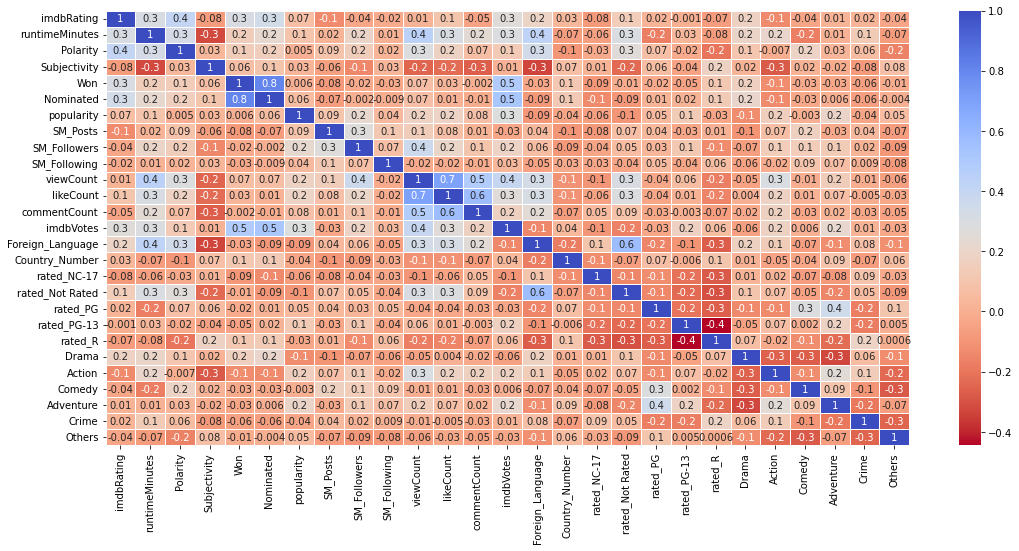

In [76]:
viz_1 = df[['imdbRating', 'runtimeMinutes', 'Polarity', 'Subjectivity',
             'Won', 'Nominated', 'popularity',
            'SM_Posts', 'SM_Followers', 'SM_Following',
            'viewCount', 'likeCount', 'commentCount',
             'imdbVotes', 'Foreign_Language', 'Country_Number',
             'rated_NC-17','rated_Not Rated', 'rated_PG', 'rated_PG-13', 'rated_R',
            'Drama', 'Action', 'Comedy', 'Adventure', 'Crime', 'Others']]


fig = plt.figure(figsize=(18,8))
sns.heatmap(viz_1.corr(), cmap='coolwarm_r', annot=True, linewidth=1, fmt='.1g')

Text(0.5, 1.0, 'Features Correlating with imdbRating')

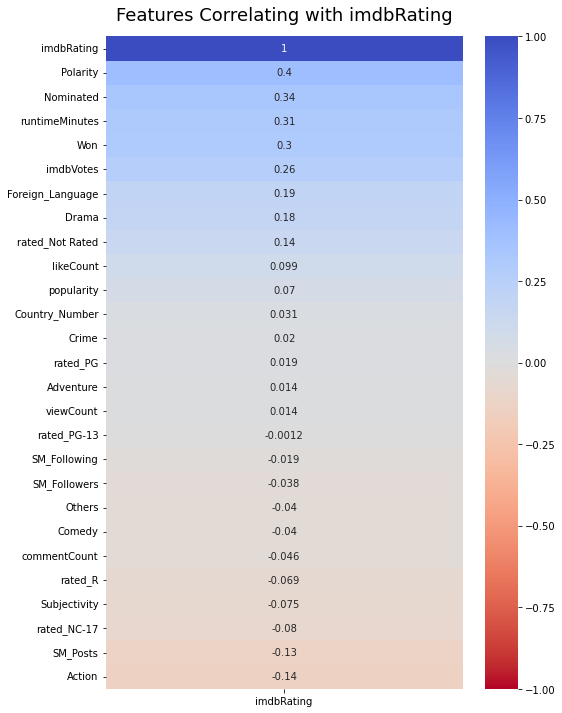

In [77]:
plt.figure(figsize=(8,12))
heatmap = sns.heatmap(viz_1.corr()[['imdbRating']].sort_values(by='imdbRating', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='coolwarm_r')
heatmap.set_title('Features Correlating with imdbRating', fontdict={'fontsize':18}, pad=16)

**imdbRating**

In [79]:
df['imdbRating'].describe()

count   708.00000
mean      6.42726
std       1.12821
min       1.10000
25%       5.80000
50%       6.50000
75%       7.20000
max       9.50000
Name: imdbRating, dtype: float64

Text(0.5, 1.0, 'imdbRating Distribution')

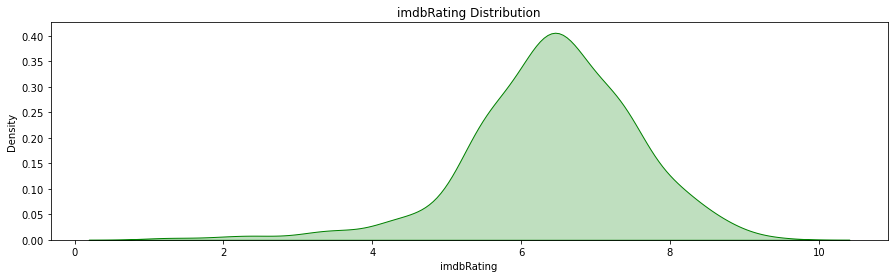

In [498]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df['imdbRating'], color='g', shade=True)
ax.set_xlabel('imdbRating')
plt.title('imdbRating Distribution')

In [499]:
print(df[df['imdbRating_Cat'] == 0]['imdbRating'].describe())
print('')
print(df[df['imdbRating_Cat'] == 1]['imdbRating'].describe())

count   362.00000
mean      7.24724
std       0.60935
min       6.50000
25%       6.70000
50%       7.20000
75%       7.60000
max       9.50000
Name: imdbRating, dtype: float64

count   346.00000
mean      5.56936
std       0.88107
min       1.10000
25%       5.30000
50%       5.80000
75%       6.20000
max       6.40000
Name: imdbRating, dtype: float64


Text(0.5, 1.0, 'imdbRating Distribution')

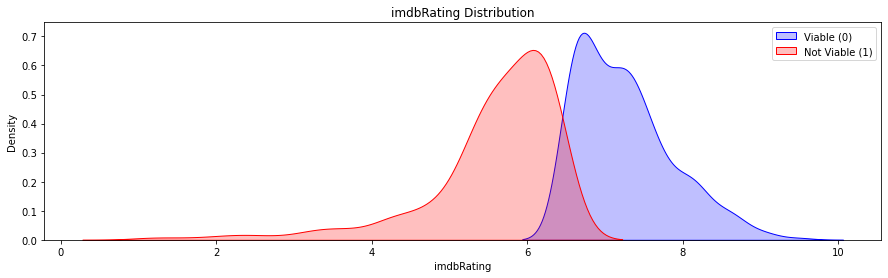

In [500]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 0), 'imdbRating'], color='b', shade=True, label='Viable (0)')
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 1), 'imdbRating'], color='r', shade=True, label='Not Viable (1)')
ax.set_xlabel('imdbRating')
plt.legend()
plt.title('imdbRating Distribution')

**imdbVotes**

In [501]:
print(df['imdbVotes'].describe())
print('')
print(df[df['imdbRating_Cat'] == 0]['imdbVotes'].describe())
print('')
print(df[df['imdbRating_Cat'] == 1]['imdbVotes'].describe())

count       708.00000
mean      64658.30085
std      101178.59411
min       10436.00000
25%       16839.00000
50%       29506.50000
75%       69107.75000
max     1143345.00000
Name: imdbVotes, dtype: float64

count       362.00000
mean      88400.26243
std      131448.85644
min       10436.00000
25%       19274.25000
50%       37678.50000
75%       98733.75000
max     1143345.00000
Name: imdbVotes, dtype: float64

count      346.00000
mean     39818.44509
std      41088.34640
min      10446.00000
25%      15078.25000
50%      23557.50000
75%      47669.75000
max     250476.00000
Name: imdbVotes, dtype: float64


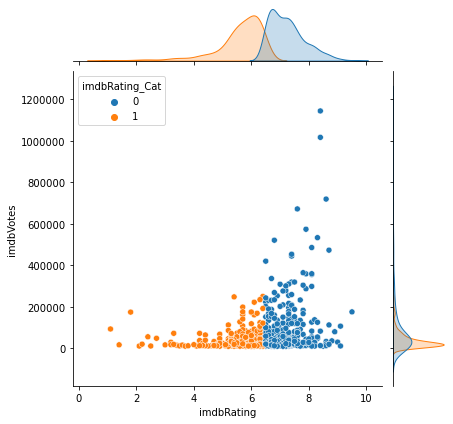

In [502]:
sns.jointplot(x='imdbRating', y='imdbVotes', data=df, hue='imdbRating_Cat')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

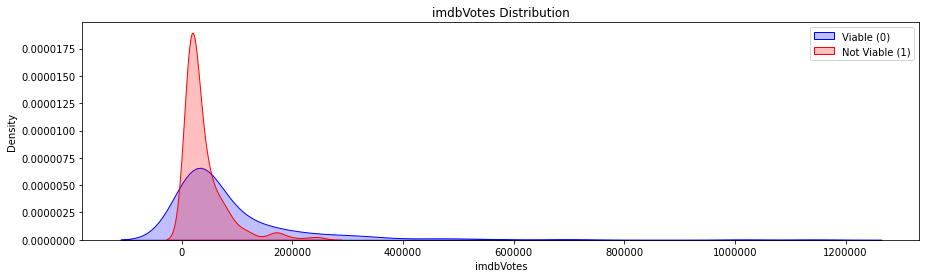

In [503]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 0), 'imdbVotes'], color='b', shade=True, label='Viable (0)')
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 1), 'imdbVotes'], color='r', shade=True, label='Not Viable (1)')
ax.set_xlabel('imdbVotes')
plt.legend()
plt.title('imdbVotes Distribution')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')

**Runtime Minutes**

In [504]:
print(df['runtimeMinutes'].describe())
print('')
print(df[df['imdbRating_Cat'] == 0]['runtimeMinutes'].describe())
print('')
print(df[df['imdbRating_Cat'] == 1]['runtimeMinutes'].describe())

count   708.00000
mean    113.08898
std      21.42806
min      55.00000
25%      97.00000
50%     109.00000
75%     124.00000
max     242.00000
Name: runtimeMinutes, dtype: float64

count   362.00000
mean    119.55801
std      23.14541
min      55.00000
25%     102.25000
50%     117.00000
75%     132.75000
max     242.00000
Name: runtimeMinutes, dtype: float64

count   346.00000
mean    106.32081
std      17.04533
min      78.00000
25%      94.00000
50%     103.00000
75%     113.75000
max     170.00000
Name: runtimeMinutes, dtype: float64


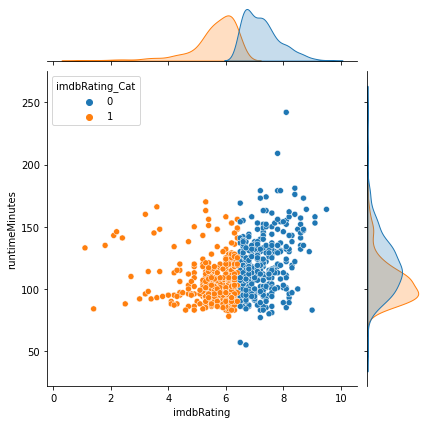

In [505]:
sns.jointplot(x='imdbRating', y='runtimeMinutes', data=df, hue='imdbRating_Cat')

Text(0.5, 1.0, 'runtimeMinutes Distribution')

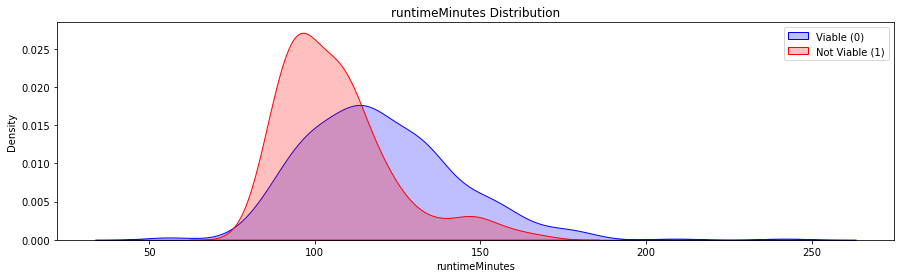

In [506]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 0), 'runtimeMinutes'], color='b', shade=True, label='Viable (0)')
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 1), 'runtimeMinutes'], color='r', shade=True, label='Not Viable (1)')
ax.set_xlabel('runtimeMinutes')
plt.legend()
plt.title('runtimeMinutes Distribution')

**Polarity**

In [507]:
print(df['Polarity'].describe())
print('')
print(df[df['imdbRating_Cat'] == 0]['Polarity'].describe())
print('')
print(df[df['imdbRating_Cat'] == 1]['Polarity'].describe())

count   708.00000
mean      0.13511
std       0.06309
min      -0.10016
25%       0.09529
50%       0.13707
75%       0.17311
max       0.36179
Name: Polarity, dtype: float64

count   362.00000
mean      0.15890
std       0.05834
min      -0.10016
25%       0.12116
50%       0.15796
75%       0.19464
max       0.36179
Name: Polarity, dtype: float64

count   346.00000
mean      0.11022
std       0.05813
min      -0.06722
25%       0.07549
50%       0.10809
75%       0.14371
max       0.28888
Name: Polarity, dtype: float64


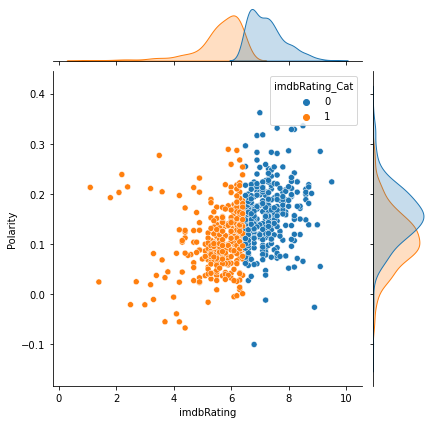

In [508]:
sns.jointplot(x='imdbRating', y='Polarity', data=df, hue='imdbRating_Cat')

Text(0.5, 1.0, 'Polarity Distribution')

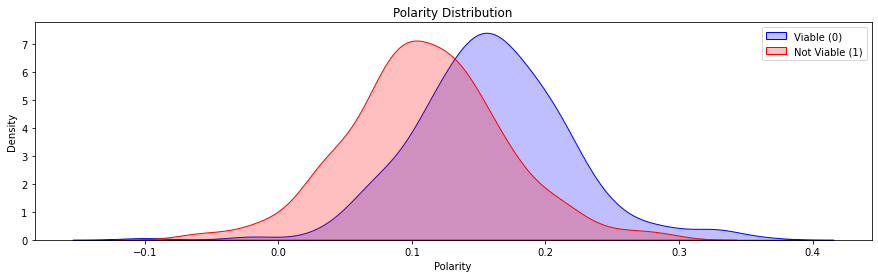

In [509]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 0), 'Polarity'], color='b', shade=True, label='Viable (0)')
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 1), 'Polarity'], color='r', shade=True, label='Not Viable (1)')
ax.set_xlabel('Polarity')
plt.legend()
plt.title('Polarity Distribution')

**Vader Sentiment**

In [510]:
print(df['Vader Sentiment'].describe())
print('')
print(df[df['imdbRating_Cat'] == 0]['Vader Sentiment'].describe())
print('')
print(df[df['imdbRating_Cat'] == 1]['Vader Sentiment'].describe())

count   708.00000
mean      0.20456
std       0.11169
min      -0.23172
25%       0.13175
50%       0.19841
75%       0.27646
max       0.61503
Name: Vader Sentiment, dtype: float64

count   362.00000
mean      0.24069
std       0.10784
min      -0.23172
25%       0.16680
50%       0.23830
75%       0.29741
max       0.61503
Name: Vader Sentiment, dtype: float64

count   346.00000
mean      0.16676
std       0.10293
min      -0.10285
25%       0.09734
50%       0.16471
75%       0.23349
max       0.46971
Name: Vader Sentiment, dtype: float64


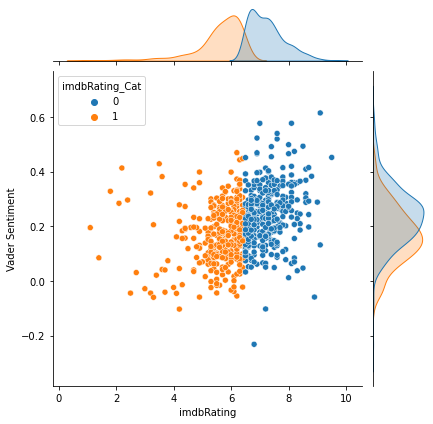

In [511]:
sns.jointplot(x='imdbRating', y='Vader Sentiment', data=df, hue='imdbRating_Cat')

Text(0.5, 1.0, 'Vader Sentiment Distribution')

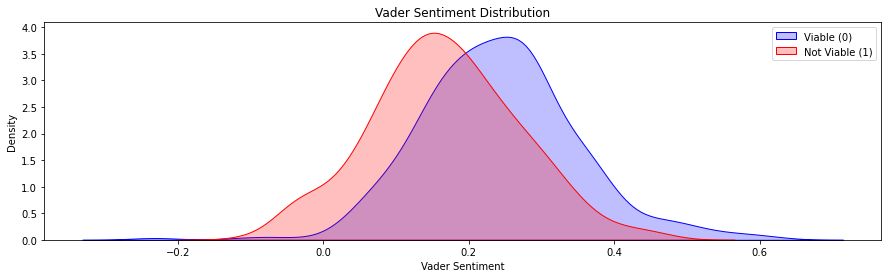

In [512]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 0), 'Vader Sentiment'], color='b', shade=True, label='Viable (0)')
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 1), 'Vader Sentiment'], color='r', shade=True, label='Not Viable (1)')
ax.set_xlabel('Vader Sentiment')
plt.legend()
plt.title('Vader Sentiment Distribution')

**Subjectivity**

In [513]:
print(df['Subjectivity'].describe())
print('')
print(df[df['imdbRating_Cat'] == 0]['Subjectivity'].describe())
print('')
print(df[df['imdbRating_Cat'] == 1]['Subjectivity'].describe())

count   708.00000
mean      0.34553
std       0.05546
min       0.06958
25%       0.32054
50%       0.34781
75%       0.37965
max       0.58472
Name: Subjectivity, dtype: float64

count   362.00000
mean      0.34041
std       0.05851
min       0.06958
25%       0.31670
50%       0.34621
75%       0.37652
max       0.48190
Name: Subjectivity, dtype: float64

count   346.00000
mean      0.35089
std       0.05162
min       0.09624
25%       0.32487
50%       0.34944
75%       0.38040
max       0.58472
Name: Subjectivity, dtype: float64


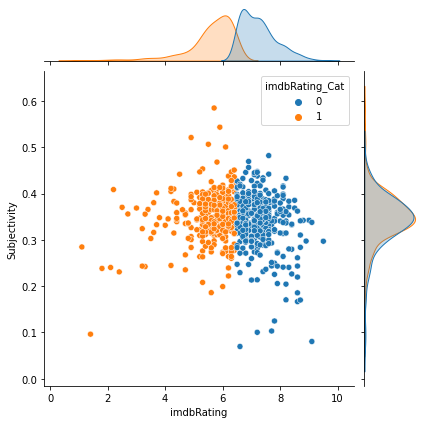

In [514]:
sns.jointplot(x='imdbRating', y='Subjectivity', data=df, hue='imdbRating_Cat')

Text(0.5, 1.0, 'Subjectivity Distribution')

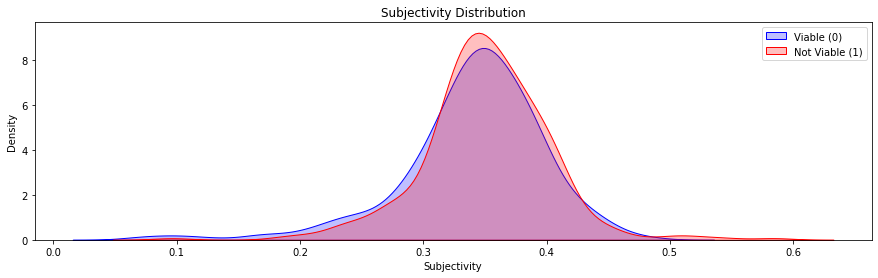

In [515]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 0), 'Subjectivity'], color='b', shade=True, label='Viable (0)')
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 1), 'Subjectivity'], color='r', shade=True, label='Not Viable (1)')
ax.set_xlabel('Subjectivity')
plt.legend()
plt.title('Subjectivity Distribution')

**Won**

In [516]:
print(df['Won'].describe())
print('')
print(df[df['imdbRating_Cat'] == 0]['Won'].describe())
print('')
print(df[df['imdbRating_Cat'] == 1]['Won'].describe())

count   708.00000
mean      8.56497
std      24.27127
min       0.00000
25%       0.00000
50%       1.00000
75%       6.00000
max     313.00000
Name: Won, dtype: float64

count   362.00000
mean     15.16298
std      32.43367
min       0.00000
25%       0.00000
50%       4.00000
75%      14.00000
max     313.00000
Name: Won, dtype: float64

count   346.00000
mean      1.66185
std       3.60814
min       0.00000
25%       0.00000
50%       0.00000
75%       2.00000
max      32.00000
Name: Won, dtype: float64


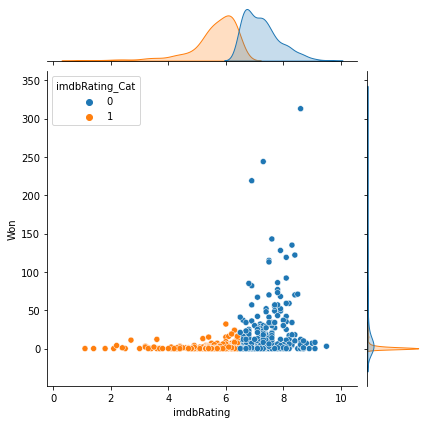

In [517]:
sns.jointplot(x='imdbRating', y='Won', data=df, hue='imdbRating_Cat')

Text(0.5, 1.0, 'Won Distribution')

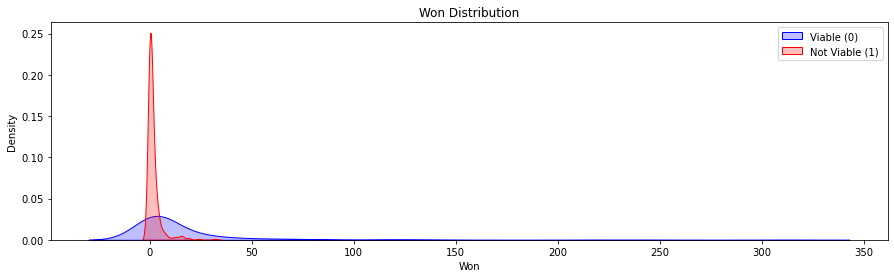

In [518]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 0), 'Won'], color='b', shade=True, label='Viable (0)')
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 1), 'Won'], color='r', shade=True, label='Not Viable (1)')
ax.set_xlabel('Won')
plt.legend()
plt.title('Won Distribution')

**Nominated**

In [519]:
print(df['Nominated'].describe())
print('')
print(df[df['imdbRating_Cat'] == 0]['Nominated'].describe())
print('')
print(df[df['imdbRating_Cat'] == 1]['Nominated'].describe())

count   708.00000
mean     22.10452
std      47.37420
min       0.00000
25%       1.00000
50%       4.50000
75%      17.25000
max     380.00000
Name: Nominated, dtype: float64

count   362.00000
mean     38.16022
std      61.38139
min       0.00000
25%       3.00000
50%      13.00000
75%      44.75000
max     380.00000
Name: Nominated, dtype: float64

count   346.00000
mean      5.30636
std      10.16495
min       0.00000
25%       0.00000
50%       2.00000
75%       6.00000
max      82.00000
Name: Nominated, dtype: float64


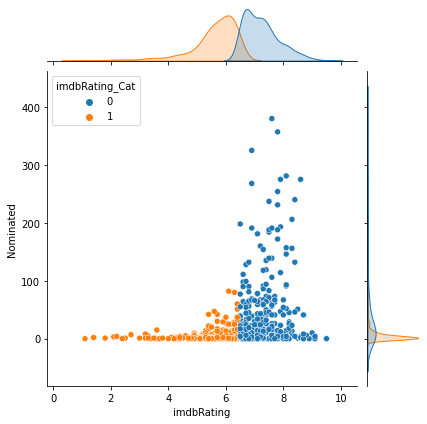

In [520]:
sns.jointplot(x='imdbRating', y='Nominated', data=df, hue='imdbRating_Cat')

Text(0.5, 1.0, 'Nominated Distribution')

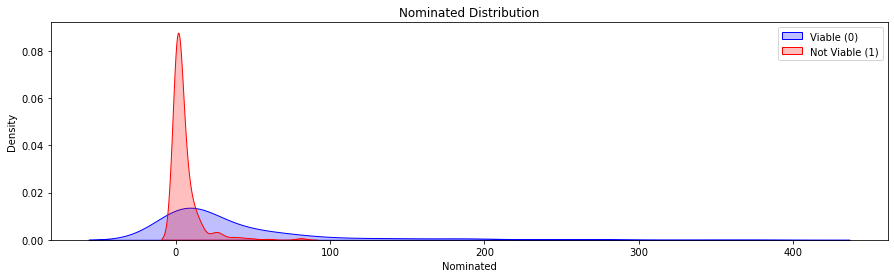

In [521]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 0), 'Nominated'], color='b', shade=True, label='Viable (0)')
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 1), 'Nominated'], color='r', shade=True, label='Not Viable (1)')
ax.set_xlabel('Nominated')
plt.legend()
plt.title('Nominated Distribution')

**Popularity**

In [522]:
print(df['popularity'].describe())
print('')
print(df[df['imdbRating_Cat'] == 0]['popularity'].describe())
print('')
print(df[df['imdbRating_Cat'] == 1]['popularity'].describe())

count    708.00000
mean      74.17712
std      229.63601
min        1.82500
25%       15.82575
50%       26.59950
75%       60.98900
max     4678.23500
Name: popularity, dtype: float64

count    362.00000
mean      78.53003
std      289.26787
min        2.23000
25%       13.57850
50%       24.41950
75%       54.66375
max     4678.23500
Name: popularity, dtype: float64

count    346.00000
mean      69.62292
std      143.06158
min        1.82500
25%       17.77025
50%       30.89250
75%       67.36700
max     1529.47500
Name: popularity, dtype: float64


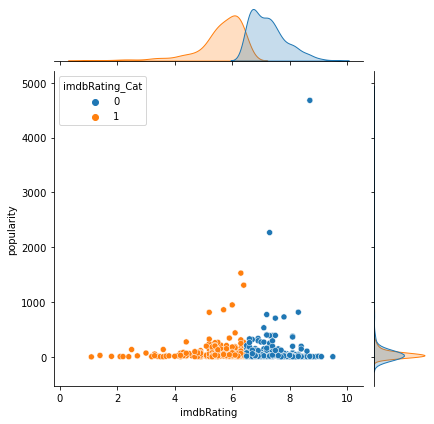

In [523]:
sns.jointplot(x='imdbRating', y='popularity', data=df, hue='imdbRating_Cat')

Text(0.5, 1.0, 'Popularity Distribution')

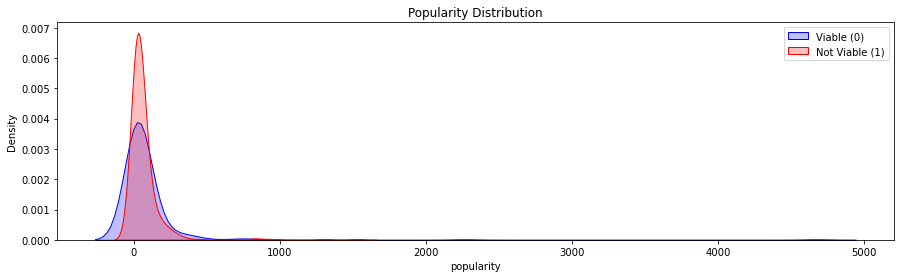

In [524]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 0), 'popularity'], color='b', shade=True, label='Viable (0)')
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 1), 'popularity'], color='r', shade=True, label='Not Viable (1)')
ax.set_xlabel('popularity')
plt.legend()
plt.title('Popularity Distribution')

**Foreign_Language**

In [525]:
print(df['Foreign_Language'].describe())
print('')
print(df[df['imdbRating_Cat'] == 0]['Foreign_Language'].describe())
print('')
print(df[df['imdbRating_Cat'] == 1]['Foreign_Language'].describe())

count   708.00000
mean      0.16525
std       0.37167
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.00000
Name: Foreign_Language, dtype: float64

count   362.00000
mean      0.23204
std       0.42272
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.00000
Name: Foreign_Language, dtype: float64

count   346.00000
mean      0.09538
std       0.29416
min       0.00000
25%       0.00000
50%       0.00000
75%       0.00000
max       1.00000
Name: Foreign_Language, dtype: float64


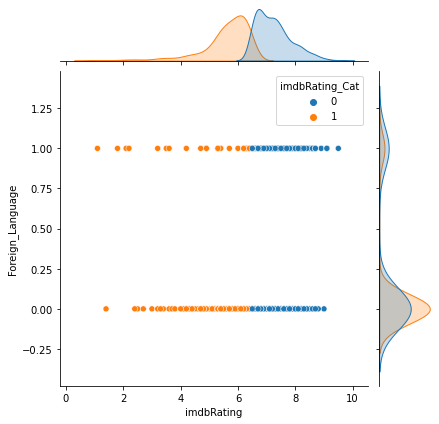

In [526]:
sns.jointplot(x='imdbRating', y='Foreign_Language', data=df, hue='imdbRating_Cat')

Text(0.5, 1.0, 'Foreign_Language Distribution')

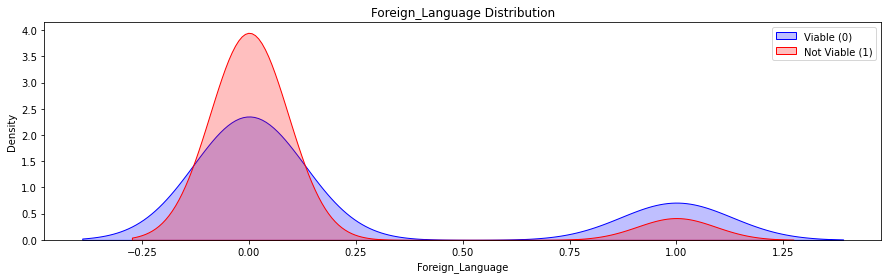

In [527]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 0), 'Foreign_Language'], color='b', shade=True, label='Viable (0)')
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 1), 'Foreign_Language'], color='r', shade=True, label='Not Viable (1)')
ax.set_xlabel('Foreign_Language')
plt.legend()
plt.title('Foreign_Language Distribution')

**Country_Number**

In [528]:
print(df['Country_Number'].describe())
print('')
print(df[df['imdbRating_Cat'] == 0]['Country_Number'].describe())
print('')
print(df[df['imdbRating_Cat'] == 1]['Country_Number'].describe())

count   708.00000
mean      1.57486
std       1.04295
min       1.00000
25%       1.00000
50%       1.00000
75%       2.00000
max      10.00000
Name: Country_Number, dtype: float64

count   362.00000
mean      1.58564
std       1.07328
min       1.00000
25%       1.00000
50%       1.00000
75%       2.00000
max      10.00000
Name: Country_Number, dtype: float64

count   346.00000
mean      1.56358
std       1.01167
min       1.00000
25%       1.00000
50%       1.00000
75%       2.00000
max       7.00000
Name: Country_Number, dtype: float64


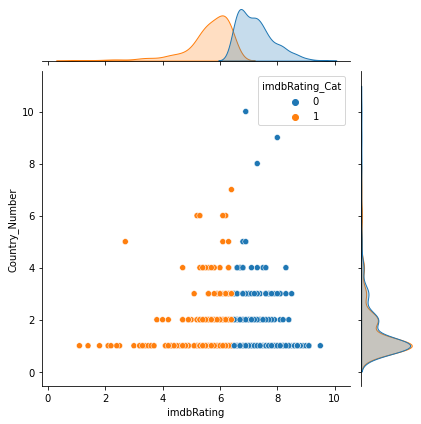

In [529]:
sns.jointplot(x='imdbRating', y='Country_Number', data=df, hue='imdbRating_Cat')

Text(0.5, 1.0, 'Country_Number Distribution')

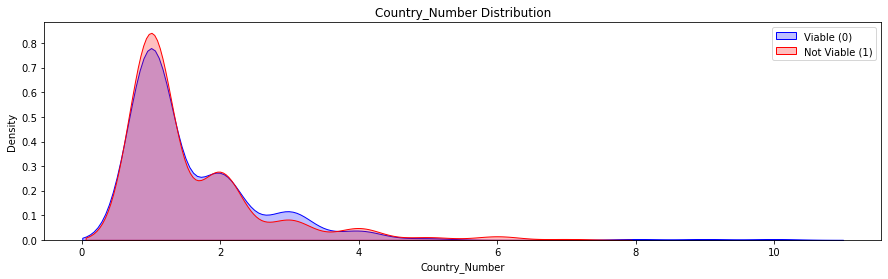

In [530]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 0), 'Country_Number'], color='b', shade=True, label='Viable (0)')
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 1), 'Country_Number'], color='r', shade=True, label='Not Viable (1)')
ax.set_xlabel('Country_Number')
plt.legend()
plt.title('Country_Number Distribution')

**Rated**

<AxesSubplot:xlabel='Rated', ylabel='Polarity'>

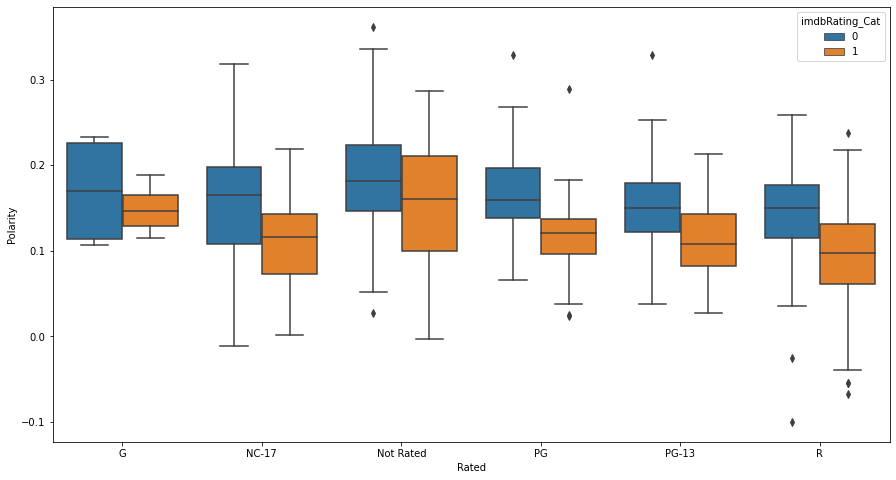

In [531]:
fig = plt.figure(figsize=(15,8),)
sns.boxplot(x='Rated', y='Polarity', data=df, hue='imdbRating_Cat')

**SM_Followers**

In [85]:
print(df['SM_Followers'].describe())
print('')
print(df[df['imdbRating_Cat'] == 0]['SM_Followers'].describe())
print('')
print(df[df['imdbRating_Cat'] == 1]['SM_Followers'].describe())

count         708.00000
mean      7192399.18671
std      16257477.41754
min             0.00000
25%        293099.41500
50%       1673833.33500
75%       6777958.66750
max     157950000.00000
Name: SM_Followers, dtype: float64

count         362.00000
mean      8052088.57646
std      19419052.54072
min             0.00000
25%        224210.41750
50%       1590284.00000
75%       6397057.37500
max     157950000.00000
Name: SM_Followers, dtype: float64

count         346.00000
mean      6292955.37431
std      12060671.22307
min             0.00000
25%        395424.75000
50%       1736267.33000
75%       7064199.99750
max     144533333.33000
Name: SM_Followers, dtype: float64


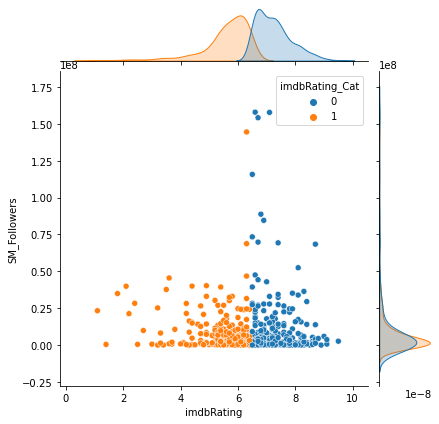

In [86]:
sns.jointplot(x='imdbRating', y='SM_Followers', data=df, hue='imdbRating_Cat')

Text(0.5, 1.0, 'SM_Followers Distribution')

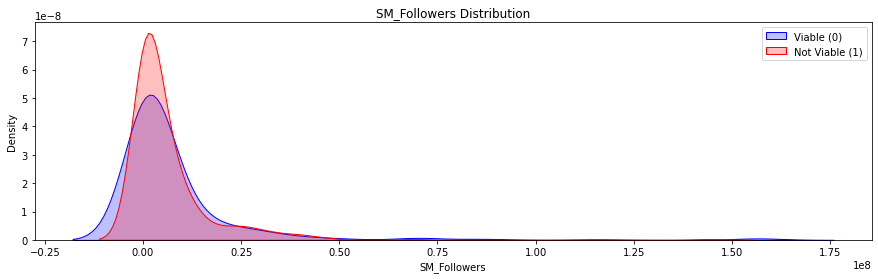

In [84]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 0), 'SM_Followers'], color='b', shade=True, label='Viable (0)')
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 1), 'SM_Followers'], color='r', shade=True, label='Not Viable (1)')
ax.set_xlabel('SM_Followers')
plt.legend()
plt.title('SM_Followers Distribution')

**likeCount**

In [90]:
print(df['likeCount'].describe())
print('')
print(df[df['imdbRating_Cat'] == 0]['likeCount'].describe())
print('')
print(df[df['imdbRating_Cat'] == 1]['likeCount'].describe())

count        708.00000
mean      191881.73870
std       552611.31501
min            0.00000
25%        14753.25000
50%        45257.50000
75%       140517.00000
max     10930644.00000
Name: likeCount, dtype: float64

count        362.00000
mean      245155.96409
std       706534.17531
min           91.00000
25%        17782.75000
50%        55883.50000
75%       220349.00000
max     10930644.00000
Name: likeCount, dtype: float64

count       346.00000
mean     136143.96532
std      312043.42717
min           0.00000
25%       12077.75000
50%       40123.00000
75%      104710.75000
max     2285014.00000
Name: likeCount, dtype: float64


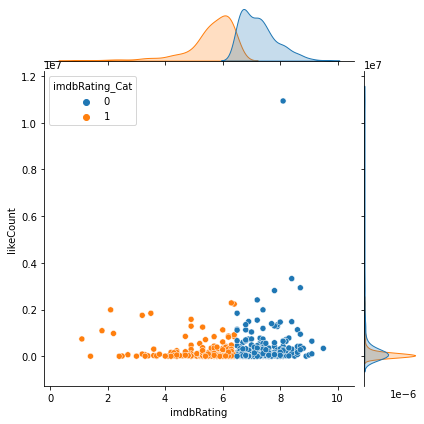

In [91]:
sns.jointplot(x='imdbRating', y='likeCount', data=df, hue='imdbRating_Cat')

Text(0.5, 1.0, 'likeCount Distribution')

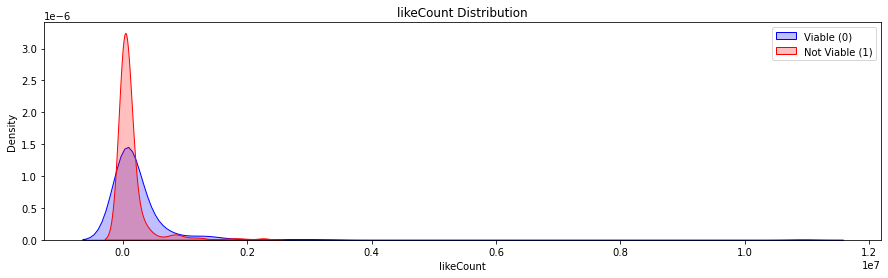

In [87]:
fig = plt.figure(figsize=(15,4),)
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 0), 'likeCount'], color='b', shade=True, label='Viable (0)')
ax = sns.kdeplot(df.loc[(df['imdbRating_Cat'] == 1), 'likeCount'], color='r', shade=True, label='Not Viable (1)')
ax.set_xlabel('likeCount')
plt.legend()
plt.title('likeCount Distribution')

# Classification Modelling

In [93]:
df.columns

Index(['Unnamed: 0', 'tconst', 'primaryTitle', 'runtimeMinutes', 'genres',
       'Unnamed: 0.1', 'Subjectivity', 'Polarity', 'Vader Sentiment', 'AI Neg',
       'AI Pos', 'Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre',
       'Language', 'Country', 'Won', 'Nominated', 'Poster', 'imdbRating',
       'imdbVotes', 'Type', 'Production', 'Website', 'Response', 'popularity',
       'SM_Posts', 'SM_Followers', 'SM_Following', 'publishedAt', 'duration',
       'viewCount', 'likeCount', 'commentCount', 'Drama', 'Action', 'Comedy',
       'Adventure', 'Crime', 'Others', 'genres_freq', 'Foreign_Language',
       'Country_Number', 'imdbRating_Cat', 'rated_NC-17', 'rated_Not Rated',
       'rated_PG', 'rated_PG-13', 'rated_R'],
      dtype='object')

In [94]:
model1 = df[['imdbRating_Cat', 'runtimeMinutes', 'Polarity', 'Subjectivity',
             'Won', 'Nominated', 'popularity',
             'SM_Followers', 'likeCount']]

In [95]:
model1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 708
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   imdbRating_Cat  708 non-null    int32  
 1   runtimeMinutes  708 non-null    int64  
 2   Polarity        708 non-null    float64
 3   Subjectivity    708 non-null    float64
 4   Won             708 non-null    int64  
 5   Nominated       708 non-null    int64  
 6   popularity      708 non-null    float64
 7   SM_Followers    708 non-null    float64
 8   likeCount       708 non-null    float64
dtypes: float64(5), int32(1), int64(3)
memory usage: 68.7 KB


In [96]:
model1

,imdbRating_Cat,runtimeMinutes,Polarity,Subjectivity,Won,Nominated,popularity,SM_Followers,likeCount
0,0,101,0.18193,0.37270,0,1,43.16600,955800.00000,99526.00000
1,0,119,0.22433,0.37120,135,206,49.03200,58344.50000,200267.00000
2,1,90,0.04338,0.40889,2,2,17.61000,21504.33000,4098.00000
3,0,99,0.09096,0.29623,0,2,35.79400,6097000.00000,67247.00000
4,1,114,0.08106,0.24219,1,5,54.20400,8150000.00000,64628.00000
...,...,...,...,...,...,...,...,...,...
704,1,78,0.08677,0.31706,2,1,35.82900,2153559.33000,12137.00000
705,0,116,0.11164,0.33216,1,19,23.83500,1394029.00000,38902.00000
706,1,93,0.07426,0.39876,0,0,34.52000,2400245.00000,3785.00000
707,0,242,0.10939,0.24098,0,4,364.50300,33916875.00000,643453.00000


In [97]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()

X = model1.drop(['imdbRating_Cat'], axis=1)
y = model1['imdbRating_Cat']

X = robust_scaler.fit_transform(X)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123, stratify=y)

**GridSearchCV Optimization for Random Forest**

In [99]:
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

import xgboost as xgb
from sklearn import svm

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

param_grid = {
    'criterion':['gini', 'entropy'],
    'n_estimators':[100,150,200],
    'max_depth':[None, 1,3,5,10],
    'min_samples_split':[5,10],
    'min_samples_leaf':[5,10]
}

gs_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
gs_rf.fit(X_train, y_train)
y_pred = gs_rf.predict(X_test)

print ("\n\n ---Random Forest Model---")
print(classification_report(y_test, gs_rf.predict(X_test)))

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))



 ---Random Forest Model---
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       109
           1       0.73      0.79      0.76       104

    accuracy                           0.75       213
   macro avg       0.75      0.75      0.75       213
weighted avg       0.75      0.75      0.75       213

Accuracy: 75.12%
Precision: 72.57%
Recall: 78.85%
F1: 75.58%


**GridSearchCV Optimization for AdaBoost**

In [101]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,200],
    'learning_rate':[0.001,0.01,0.1,0.2,0.5]
}

gs_ab = GridSearchCV(AdaBoostClassifier(), param_grid = param_grid)
gs_ab.fit(X_train, y_train)
y_pred = gs_ab.predict(X_test)

print ("\n\n ---AdaBoost Model---")
print(classification_report(y_test, gs_ab.predict(X_test)))

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))



 ---AdaBoost Model---
              precision    recall  f1-score   support

           0       0.76      0.62      0.68       109
           1       0.67      0.79      0.72       104

    accuracy                           0.70       213
   macro avg       0.71      0.71      0.70       213
weighted avg       0.71      0.70      0.70       213

Accuracy: 70.42%
Precision: 66.67%
Recall: 78.85%
F1: 72.25%


**GridSearchCV Optimization for Gradient Boosting**

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100,200,300,400],
    'learning_rate':[0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6]
}

gs_gb = GridSearchCV(GradientBoostingClassifier(), param_grid = param_grid)
gs_gb.fit(X_train, y_train)
y_pred = gs_gb.predict(X_test)

print ("\n\n ---Gradient Boosting Model---")
print(classification_report(y_test, gs_gb.predict(X_test)))

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))



 ---Gradient Boosting Model---
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       109
           1       0.71      0.80      0.75       104

    accuracy                           0.74       213
   macro avg       0.75      0.74      0.74       213
weighted avg       0.75      0.74      0.74       213

Accuracy: 74.18%
Precision: 70.94%
Recall: 79.81%
F1: 75.11%


**GridSearchCV Optimization for XGBoost**

In [103]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
    'learning_rate':[0.001,0.01,0.1,0.2,0.5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 10
param_comb = 6

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train, y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[20:50:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:50:06] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 6.63 seconds.


In [104]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([0.23471344, 0.24081891, 0.16915379, 0.21679733, 0.3170882 ,
       0.25052748]), 'std_fit_time': array([0.00467899, 0.00320298, 0.00322798, 0.00814642, 0.01430851,
       0.01825407]), 'mean_score_time': array([0.00320275, 0.00310283, 0.00320282, 0.00370314, 0.00320284,
       0.00310276]), 'std_score_time': array([0.00040039, 0.00030023, 0.00040017, 0.00064071, 0.0004004 ,
       0.00053908]), 'param_subsample': masked_array(data=[0.8, 1.0, 0.8, 0.8, 1.0, 1.0],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 5, 10, 10, 1, 1],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[4, 4, 5, 4, 4, 4],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_learning_rate': masked_arra

In [105]:
y_pred = random_search.predict(X_test)

print ("\n\n ---XGB Boosting Model---")
print(classification_report(y_test, gs_rf.predict(X_test)))

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))



 ---XGB Boosting Model---
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       109
           1       0.73      0.79      0.76       104

    accuracy                           0.75       213
   macro avg       0.75      0.75      0.75       213
weighted avg       0.75      0.75      0.75       213

Accuracy: 72.77%
Precision: 70.18%
Recall: 76.92%
F1: 73.39%


**GridSearchCV Optimization for SVM**

In [106]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {
    'kernel':['poly', 'rbf'],
    'C':[0.001,0.01,0.1,1,10],
    'gamma':[0.001,0.01,0.1,1]
}

gs_svc = GridSearchCV(SVC(), param_grid = param_grid)
gs_svc.fit(X_train, y_train)
y_pred = gs_svc.predict(X_test)

print ("\n\n ---SVM Model---")
print(classification_report(y_test, gs_svc.predict(X_test)))

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))



 ---SVM Model---
              precision    recall  f1-score   support

           0       0.85      0.64      0.73       109
           1       0.70      0.88      0.78       104

    accuracy                           0.76       213
   macro avg       0.78      0.76      0.76       213
weighted avg       0.78      0.76      0.76       213

Accuracy: 76.06%
Precision: 70.23%
Recall: 88.46%
F1: 78.30%


**Without GridSearchCV**

In [107]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve

import xgboost as xgb
from sklearn import svm

rf = RandomForestClassifier(
    n_estimators=150, 
    max_depth=5, 
    min_samples_split=10, 
    #min_samples_leaf=1,
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)

print ("\n\n ---Random Forest Model---")
print(classification_report(y_test, rf.predict(X_test)))


#400, 0.1

# Ada Boost
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.15)
ada.fit(X_train,y_train)

print ("\n\n ---AdaBoost Model---")
print(classification_report(y_test, ada.predict(X_test)))



# XGBoost
#if using multiclass: multi:softprob
#https://stackoverflow.com/questions/45815708/what-are-different-options-for-objective-functions-available-in-xgboost-xgbclass

#local --> global minimum, learning rate, high (0.9) --> faster, risk of overshooting, low (0.1) --> slower
data_dmatrix = xgb.DMatrix(data=X,label=y)
xgb_class = xgb.XGBClassifier(objective ='binary:logistic', 
                              colsample_bytree = 0.3, 
                              learning_rate = 0.2,
                              max_depth = 5, 
                              alpha = 10, 
                              n_estimators = 50,
                             eval_metric='mlogloss')
xgb_class.fit(X_train,y_train)

print ("\n\n ---XGBoost Model---")
print(classification_report(y_test, xgb_class.predict(X_test)))

C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='rbf', C=1, gamma='auto')
svc.fit(X_train,y_train)

print ("\n\n ---SVM Model---")
print(classification_report(y_test, svc.predict(X_test)))



 ---Random Forest Model---
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       109
           1       0.72      0.83      0.77       104

    accuracy                           0.76       213
   macro avg       0.76      0.76      0.76       213
weighted avg       0.76      0.76      0.75       213



 ---AdaBoost Model---
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       109
           1       0.70      0.78      0.74       104

    accuracy                           0.73       213
   macro avg       0.73      0.73      0.73       213
weighted avg       0.73      0.73      0.73       213



 ---XGBoost Model---
              precision    recall  f1-score   support

           0       0.74      0.68      0.71       109
           1       0.69      0.75      0.72       104

    accuracy                           0.71       213
   macro avg       0.72      0.71      0.71       21

**Confusion Matrix for Random Forest Model**

In [123]:
pd.crosstab(y_test, rf.predict(X_test), rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,75,34,109
1,18,86,104
All,93,120,213


**Random Forest Scores**

In [108]:
y_pred = rf.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 75.59%
Precision: 71.67%
Recall: 82.69%
F1: 76.79%


**AdaBoost Scores**

In [109]:
y_pred = ada.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 72.77%
Precision: 69.83%
Recall: 77.88%
F1: 73.64%


**XGBoost Scores**

In [110]:
y_pred = xgb_class.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 71.36%
Precision: 69.03%
Recall: 75.00%
F1: 71.89%


**SVM Scores**

In [111]:
y_pred = svc.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))

Accuracy: 73.71%
Precision: 70.34%
Recall: 79.81%
F1: 74.77%


**Predictions**

In [112]:
validation_model = pd.read_excel('Validation/validation_test_df.xlsx')

In [113]:
validation_model = validation_model[['runtimeMinutes', 'Polarity', 'Subjectivity',
             'Won', 'Nominated', 'popularity',
             'SM_Followers', 'likeCount']]

In [114]:
validation_model

,runtimeMinutes,Polarity,Subjectivity,Won,Nominated,popularity,SM_Followers,likeCount
0,126.00000,0.12450,0.32271,0,0,880.91900,163370.50000,1981946
1,146.00000,0.15435,0.34920,0,0,318.17000,12802807.67000,882203
2,116.57143,0.17225,0.34667,0,0,16.17300,6189704.33000,73923
3,116.57143,0.16464,0.35240,0,0,148.01500,3533000.00000,1666398
4,116.57143,0.12905,0.41798,0,0,13.53200,4978000.00000,202276
5,137.00000,0.14911,0.37956,0,0,619.42700,4124850.00000,203164
6,83.00000,0.07591,0.40152,0,0,632.12100,53127.67000,86114
7,94.00000,0.04627,0.39677,0,0,401.90200,1289653.67000,15996
8,116.00000,0.11342,0.38415,0,0,10763.20900,28420118.33000,324744
9,114.00000,0.12196,0.36402,0,0,81.55500,311666.67000,70740


In [115]:
print(gs_rf.predict(validation_model))
print(gs_ab.predict(validation_model))
print(gs_gb.predict(validation_model))
print(random_search.predict(validation_model))
print(gs_svc.predict(validation_model))
print('---')
print(rf.predict(validation_model))
print(ada.predict(validation_model))
print(xgb_class.predict(validation_model))
print(svc.predict(validation_model))

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
---
[0 0 0 0 0 0 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


**Feature Importance**

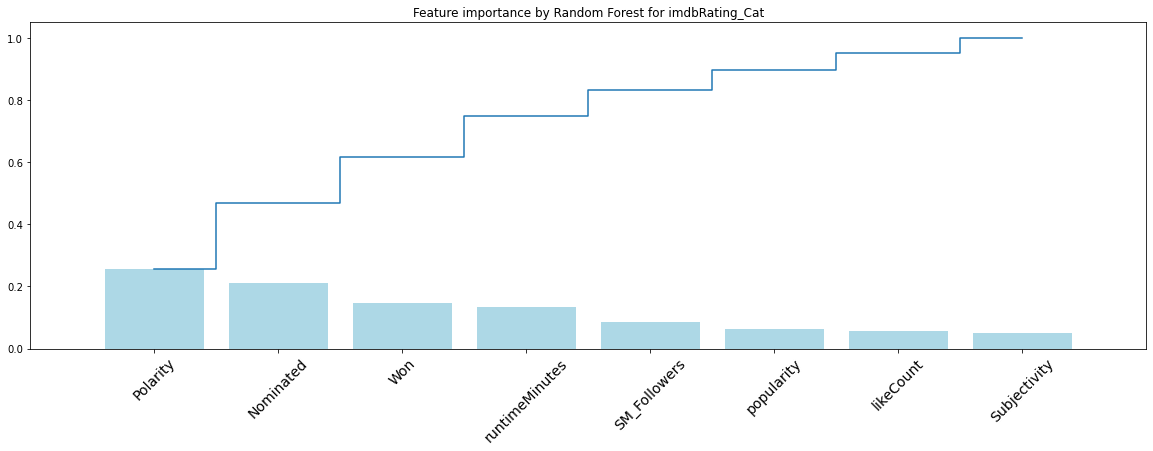

In [126]:
importances = rf.feature_importances_
feat_names = model1.drop(['imdbRating_Cat'], axis=1).columns

#RandomForest: rf
#AdaBoost: ada
#XGBoost: xgb_class
#SVM: svm

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(20,6))
plt.title("Feature importance by Random Forest for imdbRating_Cat")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='45',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

**ROC Graph**

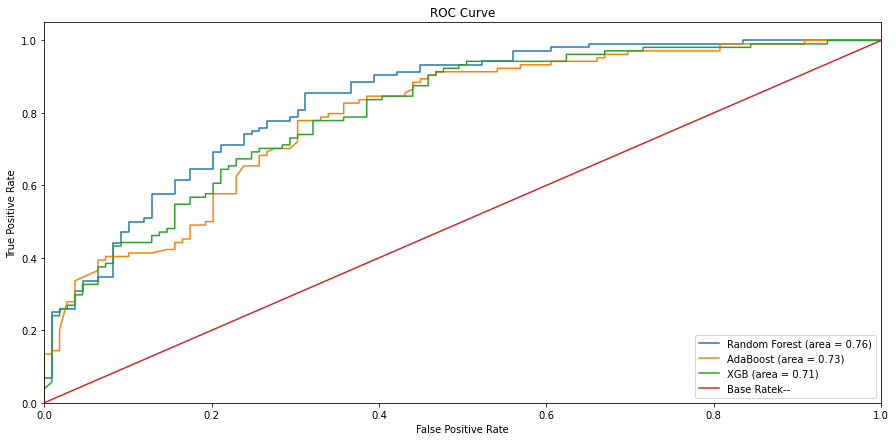

In [127]:
# Create ROC Graph
from sklearn.metrics import roc_curve

rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_class.predict_proba(X_test)[:,1])

plt.figure(figsize=(15, 7))

# Plot Random Forest ROC
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot AdaBoost ROC
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot AdaBoost ROC
xgb_roc_auc = roc_auc_score(y_test, xgb_class.predict(X_test))
plt.plot(xgb_fpr, xgb_tpr, label='XGB (area = %0.2f)' % xgb_roc_auc)


# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [130]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, rf.predict(X_test))
print(auc)

0.7574982357092448
